# Análise dos votos de 2018 no Brasil

## Configuração de ambiente

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### Verificando o uso de GPU

In [2]:
!nvidia-smi

Sun Aug 10 19:21:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.86.10              Driver Version: 570.86.10      CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   58C    P8              6W /   80W |      56MiB /   6144MiB |     25%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Visualização do Dataset

### Importação do dataset

In [3]:
url = 'https://drive.usercontent.google.com/download?id=1Sg_kAN90uldMl_cZMXpU6GroOwEGc6Z5&export=download&authuser=0&confirm=t&uuid=e46df42e-a16e-42e3-9e48-5abba4627986&at=AN8xHop2mpdXTU78g-SJGqq1kWmP%3A1754863112884'
dt_votos = pd.read_csv(url)

/tmp/ipykernel_128755/2959015386.py:2: DtypeWarning: Columns (30,32,39) have mixed types. Specify dtype option on import or set low_memory=False.
  dt_votos = pd.read_csv(url)


### Visualização das colunas

In [4]:
dt_votos.shape

(6616655, 42)

In [5]:
dt_votos.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_ UF,...,CD_CARGA_2_URNA_EFETIVADA,CD_FLASCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,10/10/2018,19:38:23,2018,228,07/10/2018,1,295,Eleição Geral Federal 2018,07/10/2018,AC,...,174.217,632C5110,29/09/2018 14:30:00,1 - 1,#NULO#,07/10/2018 08:00:00,07/10/2018 17:37:56,13,#NULO#,#NULO#
1,10/10/2018,19:38:23,2018,228,07/10/2018,1,295,Eleição Geral Federal 2018,07/10/2018,AC,...,174.217,632C5110,29/09/2018 14:30:00,1 - 1,#NULO#,07/10/2018 08:00:00,07/10/2018 17:37:56,13,#NULO#,#NULO#
2,10/10/2018,19:38:23,2018,228,07/10/2018,1,295,Eleição Geral Federal 2018,07/10/2018,AC,...,174.217,632C5110,29/09/2018 14:30:00,1 - 1,#NULO#,07/10/2018 08:00:00,07/10/2018 17:37:56,13,#NULO#,#NULO#
3,10/10/2018,19:38:23,2018,228,07/10/2018,1,295,Eleição Geral Federal 2018,07/10/2018,AC,...,174.217,632C5110,29/09/2018 14:30:00,1 - 1,#NULO#,07/10/2018 08:00:00,07/10/2018 17:37:56,13,#NULO#,#NULO#
4,10/10/2018,19:38:23,2018,228,07/10/2018,1,295,Eleição Geral Federal 2018,07/10/2018,AC,...,174.217,632C5110,29/09/2018 14:30:00,1 - 1,#NULO#,07/10/2018 08:00:00,07/10/2018 17:37:56,13,#NULO#,#NULO#


In [6]:
dt_votos['DS_ELEICAO'].unique()

array(['Eleição Geral Federal 2018'], dtype=object)

Segundo o dataset, temos algumas siglas, sua descrição é:

CD - Codigo
<br>
DT - Data
<br>
DS - Descrição
<br>
SG - Sigla
<br>
NM - Nome
<br>
QT - Quantidade

### Filtragem do dataframe

Conhecendo as colunas agora, posso selecionar algumas, como:
- ANO_ELEICAO;
- NR_TURNO;
- DS_ELEICAO;
- DT_ELEICAO;
- SG_UF;
- NM_MUNICIPIO;
- DS_CARGO_PERGUNTA;
- NR_PARTIDO;
- SG_PARTIDO;
- NM_PARTIDO;
- QT_APTOS;
- QT_COMPARECIMENTO;
- QT_ABSTENCOES;
- DS_TIPO_URNA;
- DS_TIPO_VOTAVEL;
- NR_VOTAVEL;
- NM_VOTAVEL;
- QT_VOTOS;
- NR_URNA_EFETIVADA;


In [7]:
colunas_selecionadas = [
    'ANO_ELEICAO', 'NR_TURNO', 'DS_ELEICAO', 'DT_ELEICAO',
    'SG_ UF', 'NM_MUNICIPIO', 'DS_CARGO_PERGUNTA',
    'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'QT_APTOS', 'QT_COMPARECIMENTO',
    'QT_ABSTENCOES', 'DS_TIPO_URNA', 'DS_TIPO_VOTAVEL',
    'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_URNA_EFETIVADA'
]

dt_votos_filtrados = dt_votos[colunas_selecionadas]
dt_votos_filtrados.head()

,ANO_ELEICAO,NR_TURNO,DS_ELEICAO,DT_ELEICAO,SG_ UF,NM_MUNICIPIO,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,DS_TIPO_URNA,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA
0,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,#NULO#,#NULO#,#NULO#,346,286,60,Apurada,Branco,95,Branco,3,1762466
1,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,#NULO#,#NULO#,#NULO#,346,286,60,Apurada,Nulo,96,Nulo,23,1762466
2,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,12,PDT,Partido Democrático Trabalhista,346,286,60,Apurada,Nominal,12,CIRO GOMES,12,1762466
3,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,13,PT,Partido dos Trabalhadores,346,286,60,Apurada,Nominal,13,FERNANDO HADDAD,55,1762466
4,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,15,MDB,Movimento Democrático Brasileiro,346,286,60,Apurada,Nominal,15,HENRIQUE MEIRELLES,3,1762466


Após a filtragem do dataframe, irei renomear as colunas para melhor entendimento.

In [8]:
dt_votos_filtrados = dt_votos_filtrados.rename(columns={
    'ANO_ELEICAO': 'Ano_Eleicao',
    'NR_TURNO': 'Numero_Turno',
    'CD_ELEICAO': 'Codigo_Eleicao',
    'DS_ELEICAO': 'Descricao_Eleicao',
    'DT_ELEICAO': 'Data_Eleicao',
    'SG_ UF': 'Sigla_UF',
    'CD_MUNICIPIO': 'Codigo_Municipio',
    'NM_MUNICIPIO': 'Nome_Municipio',
    'CD_CARGO_PERGUNTA': 'Codigo_Cargo',
    'DS_CARGO_PERGUNTA': 'Descricao_Cargo',
    'NR_PARTIDO': 'Numero_Partido',
    'SG_PARTIDO': 'Sigla_Partido',
    'NM_PARTIDO': 'Nome_Partido',
    'QT_APTOS': 'Quantidade_Aptos',
    'QT_COMPARECIMENTO': 'Quantidade_Comparecimento',
    'QT_ABSTENCOES': 'Quantidade_Abstencoes',
    'CD_TIPO_URNA': 'Codigo_Tipo_Urna',
    'DS_TIPO_URNA': 'Descricao_Tipo_Urna',
    'CD_TIPO_VOTAVEL': 'Codigo_Tipo_Votavel',
    'DS_TIPO_VOTAVEL': 'Descricao_Tipo_Votavel',
    'NR_VOTAVEL': 'Numero_Votavel',
    'NM_VOTAVEL': 'Nome_Votavel',
    'QT_VOTOS': 'Quantidade_Votos',
    'NR_URNA_EFETIVADA': 'Numero_Urna_Efetivada'
})

## Tratamento dos dados

### Analisando o que é null de verdade

In [9]:
dt_votos_filtrados.replace(['#NULO#', '', ' ', 'NULL', 'nan'], np.nan, inplace=True)

In [10]:
dt_votos_filtrados.head()

,Ano_Eleicao,Numero_Turno,Descricao_Eleicao,Data_Eleicao,Sigla_UF,Nome_Municipio,Descricao_Cargo,Numero_Partido,Sigla_Partido,Nome_Partido,Quantidade_Aptos,Quantidade_Comparecimento,Quantidade_Abstencoes,Descricao_Tipo_Urna,Descricao_Tipo_Votavel,Numero_Votavel,Nome_Votavel,Quantidade_Votos,Numero_Urna_Efetivada
0,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,NaN,NaN,NaN,346,286,60,Apurada,Branco,95,Branco,3,1762466
1,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,NaN,NaN,NaN,346,286,60,Apurada,Nulo,96,Nulo,23,1762466
2,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,12,PDT,Partido Democrático Trabalhista,346,286,60,Apurada,Nominal,12,CIRO GOMES,12,1762466
3,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,13,PT,Partido dos Trabalhadores,346,286,60,Apurada,Nominal,13,FERNANDO HADDAD,55,1762466
4,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,15,MDB,Movimento Democrático Brasileiro,346,286,60,Apurada,Nominal,15,HENRIQUE MEIRELLES,3,1762466


In [11]:
dt_votos_filtrados.isnull().sum()

Ano_Eleicao                        0
Numero_Turno                       0
Descricao_Eleicao                  0
Data_Eleicao                       0
Sigla_UF                           0
Nome_Municipio                     0
Descricao_Cargo                    0
Numero_Partido               1779201
Sigla_Partido                1779201
Nome_Partido                 1779201
Quantidade_Aptos                   0
Quantidade_Comparecimento          0
Quantidade_Abstencoes              0
Descricao_Tipo_Urna                0
Descricao_Tipo_Votavel             0
Numero_Votavel                     0
Nome_Votavel                       0
Quantidade_Votos                   0
Numero_Urna_Efetivada            510
dtype: int64

É possível observar que há 1779201 valores nulos em Numero_Partido, Sigla_Partido e Nome_Partido, e esse alto valor se dá por conta dos votos nulos e brancos, pois eles anulam essas colunas.

In [12]:
dt_votos_filtrados.shape

(6616655, 19)

In [13]:
dt_votos_filtrados['Descricao_Tipo_Votavel'].unique()

array(['Branco', 'Nulo', 'Nominal', 'Anulado e apurado em separado'],
      dtype=object)

Com isso em mente, vamos tentar comparar a quantidade desses votos nulos e brancos e descartar eles dessa comparação de nulabilidade.

In [14]:
votos_brancos = dt_votos_filtrados[dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Branco']
votos_nulos = dt_votos_filtrados[dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nulo']
votos_anulados = dt_votos_filtrados[dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Anulado e apurado em separado']

In [15]:
qtd_votos_brancos = len(votos_brancos)
qtd_votos_nulos = len(votos_nulos)
qtd_votos_anulados = len(votos_anulados)
total_qtd_votos = qtd_votos_brancos + qtd_votos_nulos + qtd_votos_anulados

In [16]:
print(total_qtd_votos)

1779201


In [17]:
print(1779201 - total_qtd_votos)

0


In [18]:
dt_votos_filtrados[['Numero_Partido', 'Sigla_Partido', 'Nome_Partido']] = dt_votos_filtrados[['Numero_Partido', 'Sigla_Partido', 'Nome_Partido']].fillna('Não escolhido')

In [19]:
dt_votos_filtrados

,Ano_Eleicao,Numero_Turno,Descricao_Eleicao,Data_Eleicao,Sigla_UF,Nome_Municipio,Descricao_Cargo,Numero_Partido,Sigla_Partido,Nome_Partido,Quantidade_Aptos,Quantidade_Comparecimento,Quantidade_Abstencoes,Descricao_Tipo_Urna,Descricao_Tipo_Votavel,Numero_Votavel,Nome_Votavel,Quantidade_Votos,Numero_Urna_Efetivada
0,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,Não escolhido,Não escolhido,Não escolhido,346,286,60,Apurada,Branco,95,Branco,3,1762466
1,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,Não escolhido,Não escolhido,Não escolhido,346,286,60,Apurada,Nulo,96,Nulo,23,1762466
2,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,12,PDT,Partido Democrático Trabalhista,346,286,60,Apurada,Nominal,12,CIRO GOMES,12,1762466
3,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,13,PT,Partido dos Trabalhadores,346,286,60,Apurada,Nominal,13,FERNANDO HADDAD,55,1762466
4,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,15,MDB,Movimento Democrático Brasileiro,346,286,60,Apurada,Nominal,15,HENRIQUE MEIRELLES,3,1762466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6616650,2018,2,Eleição Geral Federal 2018,28/10/2018,ZZ,TALIN,Presidente,13,PT,Partido dos Trabalhadores,46,40,6,Apurada,Nominal,13,FERNANDO HADDAD,26,1562584
6616651,2018,2,Eleição Geral Federal 2018,28/10/2018,ZZ,TALIN,Presidente,17,PSL,Partido Social Liberal,46,40,6,Apurada,Nominal,17,JAIR BOLSONARO,12,1562584
6616652,2018,2,Eleição Geral Federal 2018,28/10/2018,ZZ,KINGSTON-JAMAICA,Presidente,Não escolhido,Não escolhido,Não escolhido,94,22,72,Apurada,Branco,95,Branco,2,1561028
6616653,2018,2,Eleição Geral Federal 2018,28/10/2018,ZZ,KINGSTON-JAMAICA,Presidente,13,PT,Partido dos Trabalhadores,94,22,72,Apurada,Nominal,13,FERNANDO HADDAD,3,1561028


Ou seja, esses campos nulos são válidos, mas precisamos verificar agora o porquê dos registros com Numero_Urna_Efetivada nulos.

In [20]:
dt_numero_urnas_nulos = dt_votos_filtrados[dt_votos_filtrados['Numero_Urna_Efetivada'].isnull()]

In [21]:
dt_numero_urnas_nulos

,Ano_Eleicao,Numero_Turno,Descricao_Eleicao,Data_Eleicao,Sigla_UF,Nome_Municipio,Descricao_Cargo,Numero_Partido,Sigla_Partido,Nome_Partido,Quantidade_Aptos,Quantidade_Comparecimento,Quantidade_Abstencoes,Descricao_Tipo_Urna,Descricao_Tipo_Votavel,Numero_Votavel,Nome_Votavel,Quantidade_Votos,Numero_Urna_Efetivada
326964,2018,1,Eleição Geral Federal 2018,07/10/2018,BA,LIVRAMENTO DE NOSSA SENHORA,Presidente,Não escolhido,Não escolhido,Não escolhido,360,279,81,Apurada,Branco,95,Branco,2,NaN
326965,2018,1,Eleição Geral Federal 2018,07/10/2018,BA,LIVRAMENTO DE NOSSA SENHORA,Presidente,Não escolhido,Não escolhido,Não escolhido,360,279,81,Apurada,Nulo,96,Nulo,14,NaN
326966,2018,1,Eleição Geral Federal 2018,07/10/2018,BA,LIVRAMENTO DE NOSSA SENHORA,Presidente,12,PDT,Partido Democrático Trabalhista,360,279,81,Apurada,Nominal,12,CIRO GOMES,46,NaN
326967,2018,1,Eleição Geral Federal 2018,07/10/2018,BA,LIVRAMENTO DE NOSSA SENHORA,Presidente,13,PT,Partido dos Trabalhadores,360,279,81,Apurada,Nominal,13,FERNANDO HADDAD,117,NaN
326968,2018,1,Eleição Geral Federal 2018,07/10/2018,BA,LIVRAMENTO DE NOSSA SENHORA,Presidente,17,PSL,Partido Social Liberal,360,279,81,Apurada,Nominal,17,JAIR BOLSONARO,84,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820865,2018,1,Eleição Geral Federal 2018,07/10/2018,ZZ,KINGSTON-JAMAICA,Presidente,13,PT,Partido dos Trabalhadores,94,21,73,Apurada,Nominal,13,FERNANDO HADDAD,2,NaN
4820866,2018,1,Eleição Geral Federal 2018,07/10/2018,ZZ,KINGSTON-JAMAICA,Presidente,17,PSL,Partido Social Liberal,94,21,73,Apurada,Nominal,17,JAIR BOLSONARO,14,NaN
4820867,2018,1,Eleição Geral Federal 2018,07/10/2018,ZZ,KINGSTON-JAMAICA,Presidente,27,DC,Democracia Cristã,94,21,73,Apurada,Nominal,27,EYMAEL,1,NaN
4820868,2018,1,Eleição Geral Federal 2018,07/10/2018,ZZ,KINGSTON-JAMAICA,Presidente,45,PSDB,Partido da Social Democracia Brasileira,94,21,73,Apurada,Nominal,45,GERALDO ALCKMIN,2,NaN


Observando a tabela, percebi um padrão. Os votos não são do Brasil, e agora irei confirmar isso. Mas antes, já filtrar somente pelas urnas apuradas.

In [22]:
estados_br = [
    'AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA',
    'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN',
    'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO'
]

In [23]:
dt_urnas_apuradas = dt_votos_filtrados[dt_votos_filtrados['Descricao_Tipo_Urna'] == 'Apurada']
dt_urnas_apuradas

,Ano_Eleicao,Numero_Turno,Descricao_Eleicao,Data_Eleicao,Sigla_UF,Nome_Municipio,Descricao_Cargo,Numero_Partido,Sigla_Partido,Nome_Partido,Quantidade_Aptos,Quantidade_Comparecimento,Quantidade_Abstencoes,Descricao_Tipo_Urna,Descricao_Tipo_Votavel,Numero_Votavel,Nome_Votavel,Quantidade_Votos,Numero_Urna_Efetivada
0,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,Não escolhido,Não escolhido,Não escolhido,346,286,60,Apurada,Branco,95,Branco,3,1762466
1,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,Não escolhido,Não escolhido,Não escolhido,346,286,60,Apurada,Nulo,96,Nulo,23,1762466
2,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,12,PDT,Partido Democrático Trabalhista,346,286,60,Apurada,Nominal,12,CIRO GOMES,12,1762466
3,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,13,PT,Partido dos Trabalhadores,346,286,60,Apurada,Nominal,13,FERNANDO HADDAD,55,1762466
4,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,15,MDB,Movimento Democrático Brasileiro,346,286,60,Apurada,Nominal,15,HENRIQUE MEIRELLES,3,1762466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6616650,2018,2,Eleição Geral Federal 2018,28/10/2018,ZZ,TALIN,Presidente,13,PT,Partido dos Trabalhadores,46,40,6,Apurada,Nominal,13,FERNANDO HADDAD,26,1562584
6616651,2018,2,Eleição Geral Federal 2018,28/10/2018,ZZ,TALIN,Presidente,17,PSL,Partido Social Liberal,46,40,6,Apurada,Nominal,17,JAIR BOLSONARO,12,1562584
6616652,2018,2,Eleição Geral Federal 2018,28/10/2018,ZZ,KINGSTON-JAMAICA,Presidente,Não escolhido,Não escolhido,Não escolhido,94,22,72,Apurada,Branco,95,Branco,2,1561028
6616653,2018,2,Eleição Geral Federal 2018,28/10/2018,ZZ,KINGSTON-JAMAICA,Presidente,13,PT,Partido dos Trabalhadores,94,22,72,Apurada,Nominal,13,FERNANDO HADDAD,3,1561028


In [24]:
dt_urnas_apuradas_brasil = dt_urnas_apuradas[dt_urnas_apuradas['Sigla_UF'].isin(estados_br)]
dt_urnas_apuradas_brasil

,Ano_Eleicao,Numero_Turno,Descricao_Eleicao,Data_Eleicao,Sigla_UF,Nome_Municipio,Descricao_Cargo,Numero_Partido,Sigla_Partido,Nome_Partido,Quantidade_Aptos,Quantidade_Comparecimento,Quantidade_Abstencoes,Descricao_Tipo_Urna,Descricao_Tipo_Votavel,Numero_Votavel,Nome_Votavel,Quantidade_Votos,Numero_Urna_Efetivada
0,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,Não escolhido,Não escolhido,Não escolhido,346,286,60,Apurada,Branco,95,Branco,3,1762466
1,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,Não escolhido,Não escolhido,Não escolhido,346,286,60,Apurada,Nulo,96,Nulo,23,1762466
2,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,12,PDT,Partido Democrático Trabalhista,346,286,60,Apurada,Nominal,12,CIRO GOMES,12,1762466
3,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,13,PT,Partido dos Trabalhadores,346,286,60,Apurada,Nominal,13,FERNANDO HADDAD,55,1762466
4,2018,1,Eleição Geral Federal 2018,07/10/2018,AC,BUJARI,Presidente,15,MDB,Movimento Democrático Brasileiro,346,286,60,Apurada,Nominal,15,HENRIQUE MEIRELLES,3,1762466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6613740,2018,2,Eleição Geral Federal 2018,28/10/2018,TO,BARROLÂNDIA,Presidente,17,PSL,Partido Social Liberal,210,136,74,Apurada,Nominal,17,JAIR BOLSONARO,61,1093044
6613741,2018,2,Eleição Geral Federal 2018,28/10/2018,TO,BARROLÂNDIA,Presidente,Não escolhido,Não escolhido,Não escolhido,119,83,36,Apurada,Branco,95,Branco,1,1093466
6613742,2018,2,Eleição Geral Federal 2018,28/10/2018,TO,BARROLÂNDIA,Presidente,Não escolhido,Não escolhido,Não escolhido,119,83,36,Apurada,Nulo,96,Nulo,8,1093466
6613743,2018,2,Eleição Geral Federal 2018,28/10/2018,TO,BARROLÂNDIA,Presidente,13,PT,Partido dos Trabalhadores,119,83,36,Apurada,Nominal,13,FERNANDO HADDAD,36,1093466


In [25]:
dt_urnas_apuradas_estrangeiras = dt_urnas_apuradas[~dt_urnas_apuradas['Sigla_UF'].isin(estados_br)]
dt_urnas_apuradas_estrangeiras

,Ano_Eleicao,Numero_Turno,Descricao_Eleicao,Data_Eleicao,Sigla_UF,Nome_Municipio,Descricao_Cargo,Numero_Partido,Sigla_Partido,Nome_Partido,Quantidade_Aptos,Quantidade_Comparecimento,Quantidade_Abstencoes,Descricao_Tipo_Urna,Descricao_Tipo_Votavel,Numero_Votavel,Nome_Votavel,Quantidade_Votos,Numero_Urna_Efetivada
4812545,2018,1,Eleição Geral Federal 2018,07/10/2018,ZZ,KATMANDU,Presidente,13,PT,Partido dos Trabalhadores,36,24,12,Apurada,Nominal,13,FERNANDO HADDAD,8,NaN
4812546,2018,1,Eleição Geral Federal 2018,07/10/2018,ZZ,KATMANDU,Presidente,17,PSL,Partido Social Liberal,36,24,12,Apurada,Nominal,17,JAIR BOLSONARO,15,NaN
4812547,2018,1,Eleição Geral Federal 2018,07/10/2018,ZZ,KATMANDU,Presidente,18,REDE,Rede Sustentabilidade,36,24,12,Apurada,Nominal,18,MARINA SILVA,1,NaN
4812548,2018,1,Eleição Geral Federal 2018,07/10/2018,ZZ,ABIDJÃ,Presidente,Não escolhido,Não escolhido,Não escolhido,68,33,35,Apurada,Nulo,96,Nulo,1,NaN
4812549,2018,1,Eleição Geral Federal 2018,07/10/2018,ZZ,ABIDJÃ,Presidente,12,PDT,Partido Democrático Trabalhista,68,33,35,Apurada,Nominal,12,CIRO GOMES,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6616650,2018,2,Eleição Geral Federal 2018,28/10/2018,ZZ,TALIN,Presidente,13,PT,Partido dos Trabalhadores,46,40,6,Apurada,Nominal,13,FERNANDO HADDAD,26,1562584
6616651,2018,2,Eleição Geral Federal 2018,28/10/2018,ZZ,TALIN,Presidente,17,PSL,Partido Social Liberal,46,40,6,Apurada,Nominal,17,JAIR BOLSONARO,12,1562584
6616652,2018,2,Eleição Geral Federal 2018,28/10/2018,ZZ,KINGSTON-JAMAICA,Presidente,Não escolhido,Não escolhido,Não escolhido,94,22,72,Apurada,Branco,95,Branco,2,1561028
6616653,2018,2,Eleição Geral Federal 2018,28/10/2018,ZZ,KINGSTON-JAMAICA,Presidente,13,PT,Partido dos Trabalhadores,94,22,72,Apurada,Nominal,13,FERNANDO HADDAD,3,1561028


Enfim, minha hipótese de que as urnas com Numero_Urna_Efetiva são nulas somente em outros países foi refutada, sendo assim não encontrei nenhum padrão. Mas os votos continuam válidos. 

In [26]:
dt_votos_filtrados['Numero_Urna_Efetivada'] = dt_votos_filtrados['Numero_Urna_Efetivada'].fillna('Não especificado')

### Tratando os tipos de cada coluna

In [27]:
dt_votos_filtrados.dtypes

Ano_Eleicao                   int64
Numero_Turno                  int64
Descricao_Eleicao            object
Data_Eleicao                 object
Sigla_UF                     object
Nome_Municipio               object
Descricao_Cargo              object
Numero_Partido               object
Sigla_Partido                object
Nome_Partido                 object
Quantidade_Aptos              int64
Quantidade_Comparecimento     int64
Quantidade_Abstencoes         int64
Descricao_Tipo_Urna          object
Descricao_Tipo_Votavel       object
Numero_Votavel                int64
Nome_Votavel                 object
Quantidade_Votos              int64
Numero_Urna_Efetivada        object
dtype: object

Algumas colunas devem ser alteradas os tipos, como:
- Numero_Partido -> Int64
- Numero_Urna_Efetivada -> Int64

Mas antes, preciso verificar quais os valores diferentes do tipo final (após a ->) estão presentes em cada uma dessas colunas.

In [28]:
dt_votos_filtrados['Data_Eleicao'].unique()

array(['07/10/2018', '28/10/2018'], dtype=object)

In [29]:
invalid_numero_urna = dt_votos_filtrados.loc[
    ~pd.to_numeric(dt_votos_filtrados['Numero_Urna_Efetivada'], errors='coerce').notnull(),
    'Numero_Urna_Efetivada'
].unique()
    
print("Valores inválidos em Numero_Urna_Efetivada:", invalid_numero_urna)

invalid_numero_partido = dt_votos_filtrados.loc[
    ~pd.to_numeric(dt_votos_filtrados['Numero_Partido'], errors='coerce').notnull(),
    'Numero_Partido'
].unique()

print("Valores inválidos em Numero_Partido:", invalid_numero_partido)

Valores inválidos em Numero_Urna_Efetivada: ['Não especificado']
Valores inválidos em Numero_Partido: ['Não escolhido']


Após observar o resultado, os tipos que se configuram como strings nessas duas colunas foi o que foi utilizado para preencher os campos nulos, logo não precisamos converter seus tipos.

### Criando a coluna região

In [30]:
regioes_br = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

In [31]:
def get_regiao(sigla_uf):
    for regiao, estados in regioes_br.items():
        if sigla_uf in estados:
            return regiao
    return 'Estrangeiro'

In [32]:
dt_votos_filtrados['Regiao'] = dt_votos_filtrados['Sigla_UF'].apply(get_regiao)

## Análise dos dados

### Quantidade de votos por turno

In [33]:
dt_votos_por_turno = dt_votos_filtrados.groupby('Numero_Turno')['Quantidade_Votos'].sum().sort_values(ascending=False)

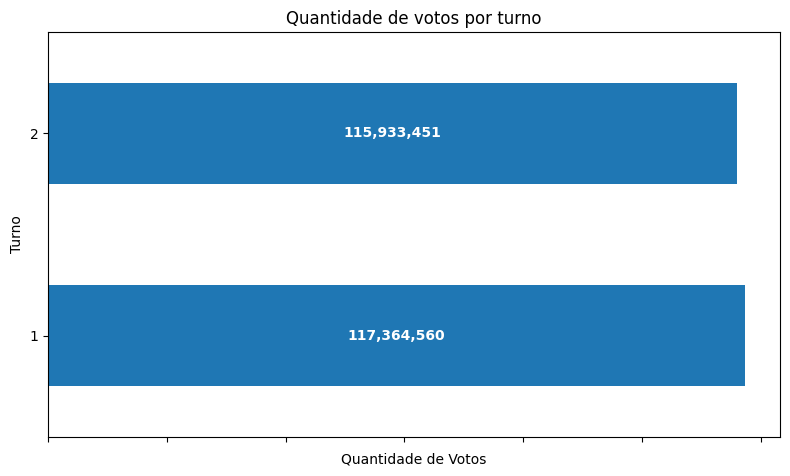

In [34]:
plt.figure(figsize=(8,5))
ax = dt_votos_por_turno.plot(kind='barh', color='tab:blue')
plt.title('Quantidade de votos por turno')
plt.xlabel('Quantidade de Votos')
plt.ylabel('Turno')
plt.tight_layout()
ax.set_xticklabels([])

for i, v in enumerate(dt_votos_por_turno):
    largura_barra = ax.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(dt_votos_por_turno) * 0.15:
        ax.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax.text(largura_barra + max(dt_votos_por_turno)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()

### Quantidade de votos por tipo

#### Filtro: 1º Turno

In [35]:
dt_votos_tipo_turno_1 = dt_votos_filtrados[dt_votos_filtrados['Numero_Turno'] == 1]
dt_votos_tipo_sum_1 = dt_votos_tipo_turno_1.groupby('Descricao_Tipo_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)

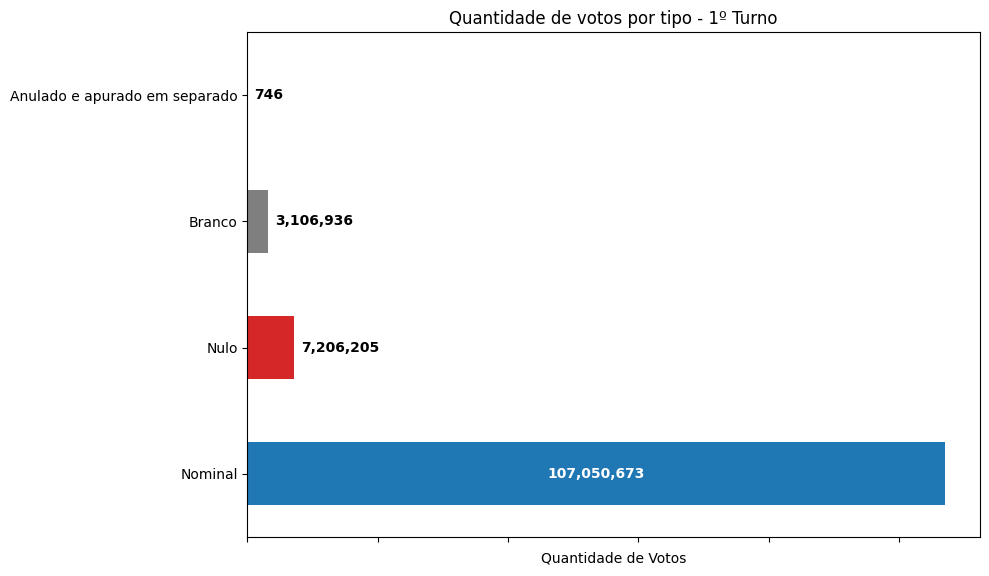

In [36]:
plt.figure(figsize=(10,6))
ax1 = dt_votos_tipo_sum_1.plot(kind='barh', color=['tab:blue', 'tab:red', 'tab:gray'])
plt.title('Quantidade de votos por tipo - 1º Turno')
plt.xlabel('Quantidade de Votos')
plt.ylabel('')
plt.tight_layout()
ax1.set_xticklabels([])

for i, v in enumerate(dt_votos_tipo_sum_1):
    largura_barra = ax1.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(dt_votos_tipo_sum_1) * 0.15:
        ax1.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax1.text(largura_barra + max(dt_votos_tipo_sum_1)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()

#### Filtro: 2º Turno

In [37]:
dt_votos_tipo_turno_2 = dt_votos_filtrados[dt_votos_filtrados['Numero_Turno'] == 2]
dt_votos_tipo_sum_2 = dt_votos_tipo_turno_2.groupby('Descricao_Tipo_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)

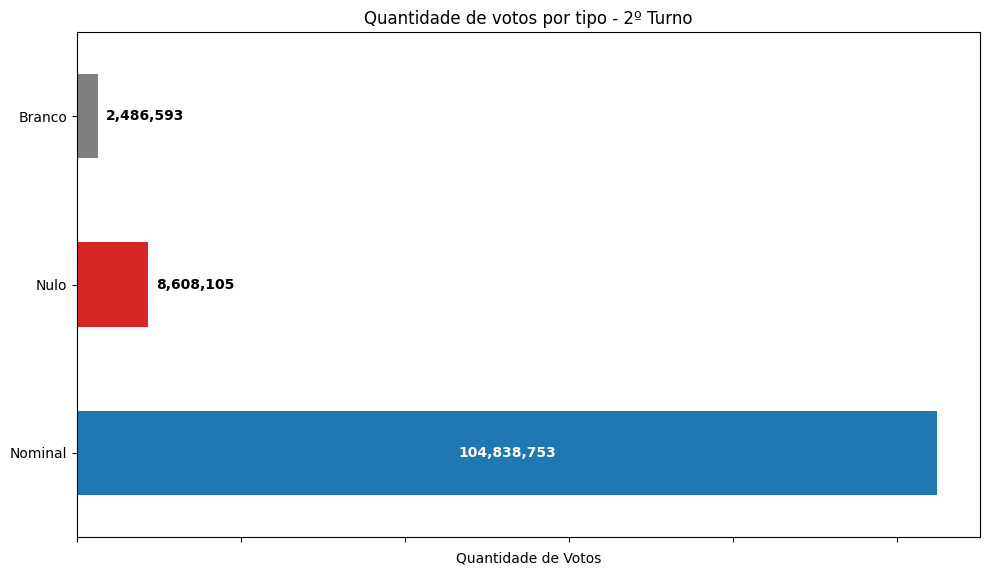

In [38]:
plt.figure(figsize=(10,6))
ax2 = dt_votos_tipo_sum_2.plot(kind='barh', color=['tab:blue', 'tab:red', 'tab:gray'])
plt.title('Quantidade de votos por tipo - 2º Turno')
plt.xlabel('Quantidade de Votos')
plt.ylabel('')
plt.tight_layout()
ax2.set_xticklabels([])

for i, v in enumerate(dt_votos_tipo_sum_2):
    largura_barra = ax2.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(dt_votos_tipo_sum_2) * 0.15:
        ax2.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax2.text(largura_barra + max(dt_votos_tipo_sum_2)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()

#### Filtro: Nenhum

In [39]:
dt_votos_tipo_total_sum = dt_votos_filtrados.groupby('Descricao_Tipo_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)

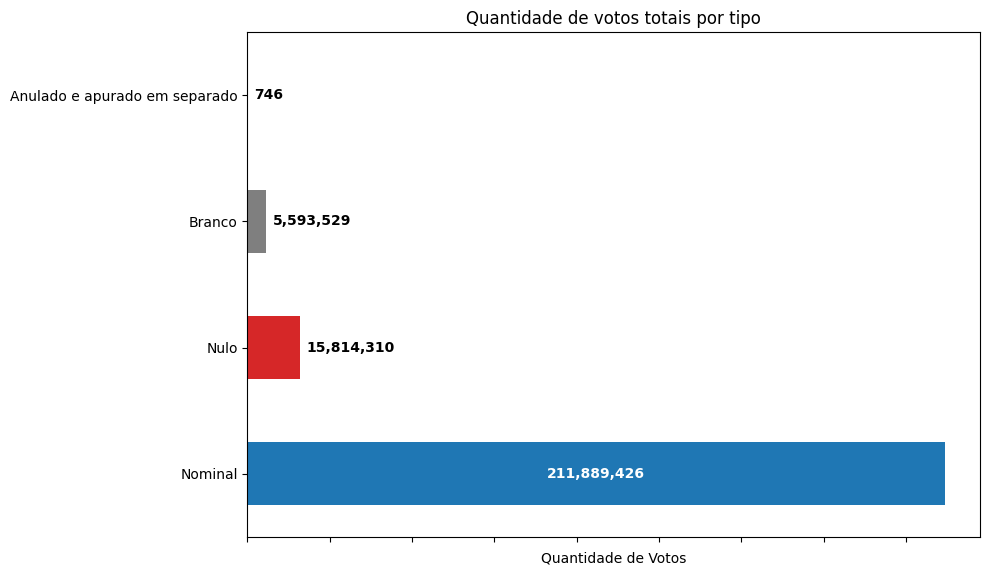

In [40]:
plt.figure(figsize=(10,6))
ax = dt_votos_tipo_total_sum.plot(kind='barh', color=['tab:blue', 'tab:red', 'tab:gray'])
plt.title('Quantidade de votos totais por tipo')
plt.xlabel('Quantidade de Votos')
plt.ylabel(ylabel='')
plt.tight_layout()

ax.set_xticklabels([])

for i, v in enumerate(dt_votos_tipo_total_sum):
    largura_barra = ax.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(dt_votos_tipo_total_sum) * 0.15:
        ax.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax.text(largura_barra + max(dt_votos_tipo_total_sum)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()

### Quantidades de votos por região

#### Filtros: 1º Turno

In [41]:
dt_votos_nominais_1 = dt_votos_filtrados[
    (dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal') &
    (dt_votos_filtrados['Numero_Turno'] == 1)
]
dt_votos_por_regiao_1 = dt_votos_nominais_1.groupby('Regiao')['Quantidade_Votos'].sum().sort_values(ascending=False)

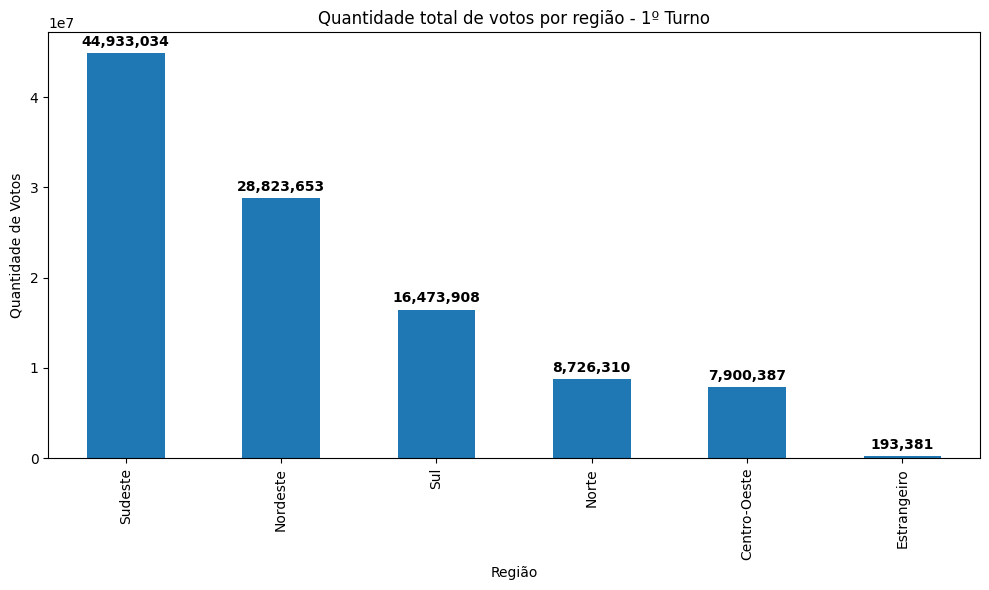

In [42]:
plt.figure(figsize=(10,6))
ax = dt_votos_por_regiao_1.plot(kind='bar', color='tab:blue')
plt.title('Quantidade total de votos por região - 1º Turno')
plt.xlabel('Região')
plt.ylabel('Quantidade de Votos')
plt.tight_layout()

for i, v in enumerate(dt_votos_por_regiao_1):
    altura_barra = ax.patches[i].get_height()
    texto = f'{v:,}'
    ax.text(i, altura_barra + max(dt_votos_por_regiao_1)*0.01, texto, ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

#### Filtros: 2º Turno

In [43]:
dt_votos_nominais_2 = dt_votos_filtrados[
    (dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal') &
    (dt_votos_filtrados['Numero_Turno'] == 2)
]
dt_votos_por_regiao_2 = dt_votos_nominais_2.groupby('Regiao')['Quantidade_Votos'].sum().sort_values(ascending=False)

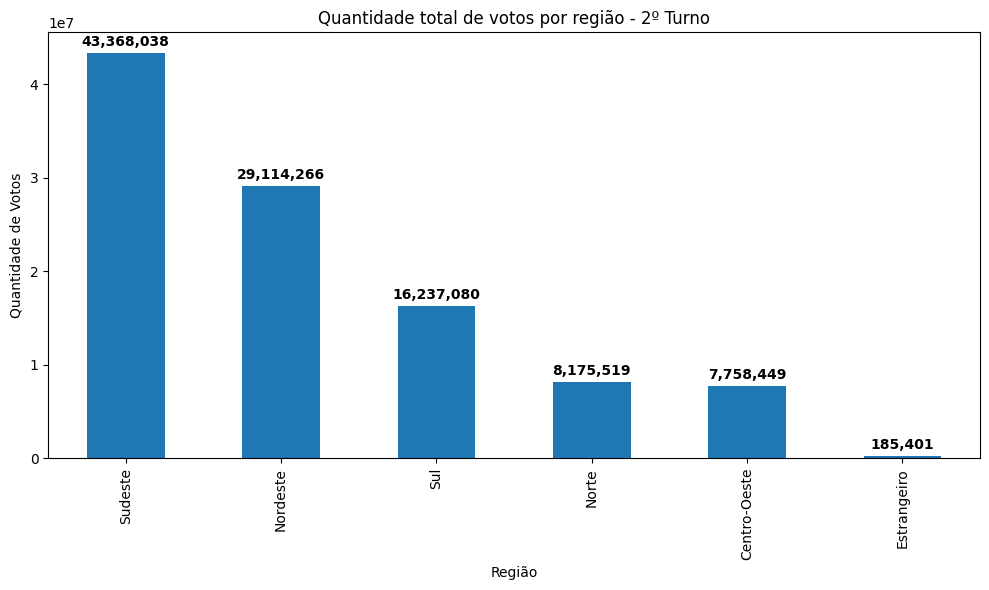

In [44]:
plt.figure(figsize=(10,6))
ax = dt_votos_por_regiao_2.plot(kind='bar', color='tab:blue')
plt.title('Quantidade total de votos por região - 2º Turno')
plt.xlabel('Região')
plt.ylabel('Quantidade de Votos')
plt.tight_layout()

for i, v in enumerate(dt_votos_por_regiao_2):
    altura_barra = ax.patches[i].get_height()
    texto = f'{v:,}'
    ax.text(i, altura_barra + max(dt_votos_por_regiao_2)*0.01, texto, ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

#### Filtros: Nenhum

In [45]:
dt_votos_nominais_total = dt_votos_filtrados[dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal']
dt_votos_por_regiao_total = dt_votos_nominais_total.groupby('Regiao')['Quantidade_Votos'].sum().sort_values(ascending=False)

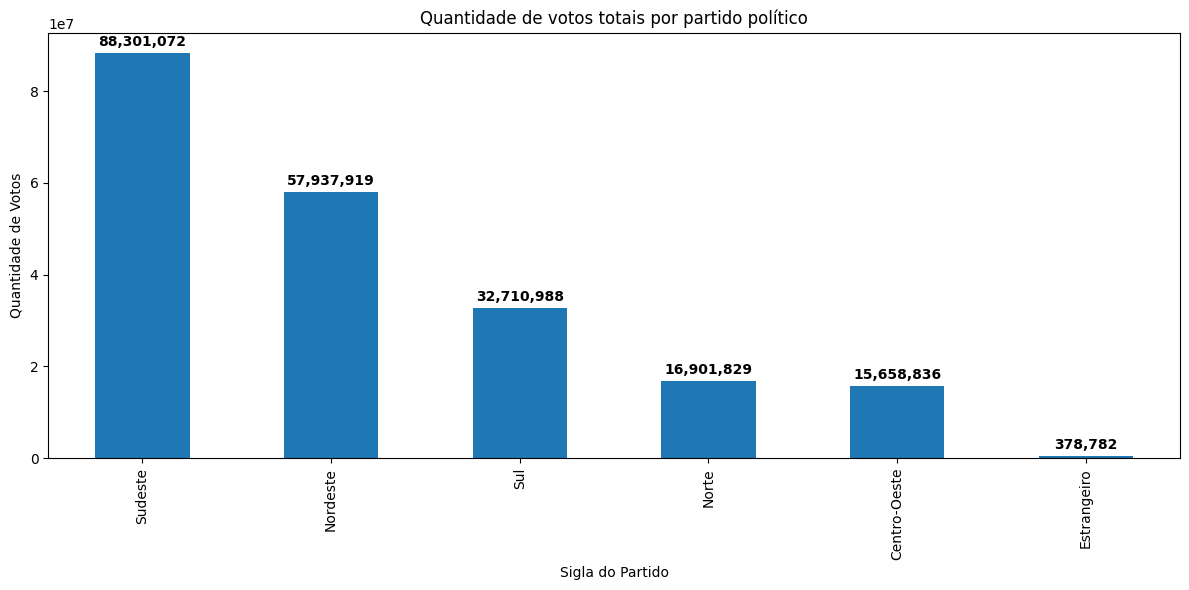

In [46]:
plt.figure(figsize=(12,6))
ax1 = dt_votos_por_regiao_total.plot(kind='bar', color='tab:blue')
plt.title('Quantidade de votos totais por partido político')
plt.xlabel('Sigla do Partido')
plt.ylabel('Quantidade de Votos')
plt.tight_layout()

for i, v in enumerate(dt_votos_por_regiao_total):
    altura_barra = ax1.patches[i].get_height()
    texto = f'{v:,}'
    ax1.text(i, altura_barra + max(dt_votos_por_regiao_total)*0.01, texto, ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

### Quantidade de votos por estado

#### Filtros: 1º Turno

In [47]:
dt_votos_filtrados_estado_1 = dt_votos_nominais_1.copy()
dt_votos_filtrados_estado_1['Sigla_UF'] = dt_votos_filtrados_estado_1['Sigla_UF'].apply(
    lambda uf: uf if uf in estados_br else 'Estrangeiro'
)

In [48]:
dt_votos_por_estado_1 = dt_votos_filtrados_estado_1.groupby('Sigla_UF')['Quantidade_Votos'].sum().sort_values(ascending=False)

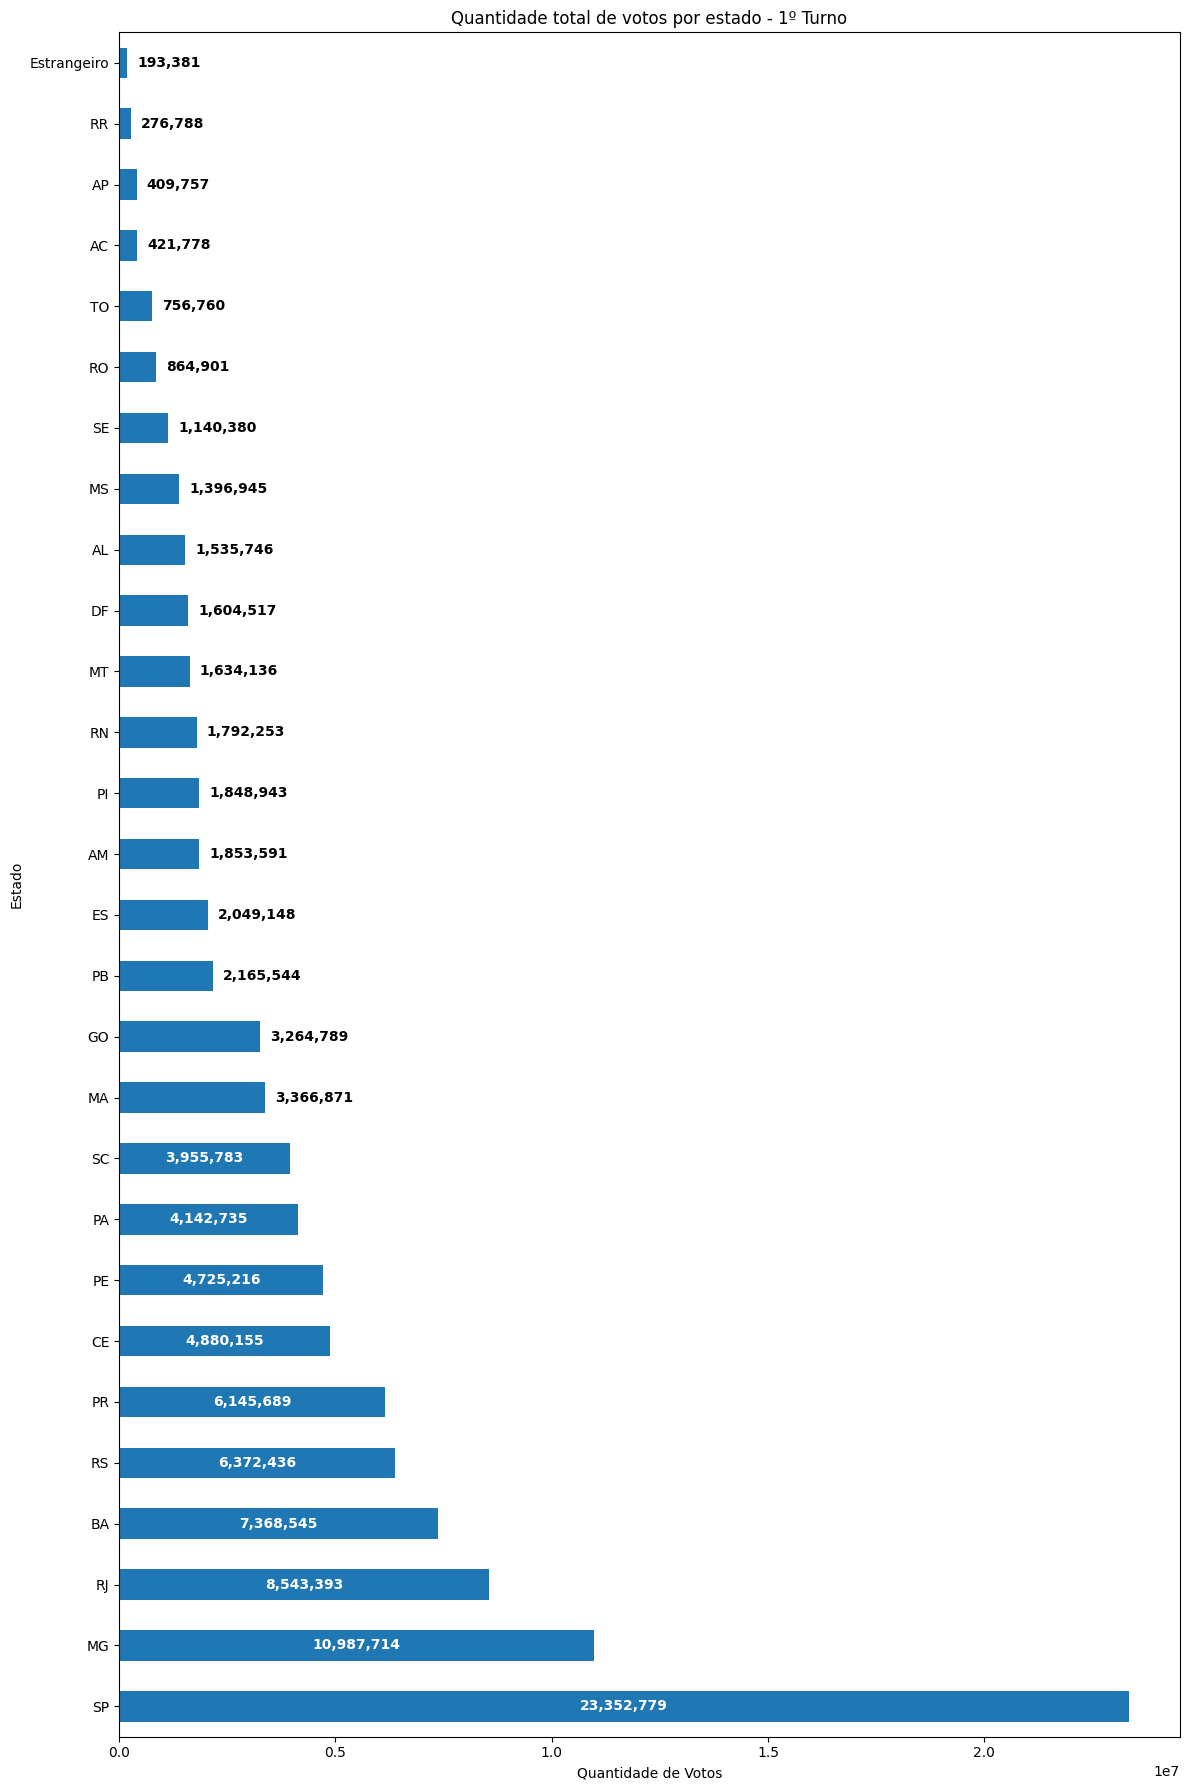

In [49]:
plt.figure(figsize=(12, 18))
ax = dt_votos_por_estado_1.plot(kind='barh', color='tab:blue')
plt.title('Quantidade total de votos por estado - 1º Turno')
plt.xlabel('Quantidade de Votos')
plt.ylabel('Estado')
plt.tight_layout()

for i, v in enumerate(dt_votos_por_estado_1):
    largura_barra = ax.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(dt_votos_por_estado_1) * 0.15:
        ax.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax.text(largura_barra + max(dt_votos_por_estado_1)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()

#### Filtros: 2º Turno

In [50]:
dt_votos_filtrados_estado_2 = dt_votos_nominais_2.copy()
dt_votos_filtrados_estado_2['Sigla_UF'] = dt_votos_filtrados_estado_2['Sigla_UF'].apply(
    lambda uf: uf if uf in estados_br else 'Estrangeiro'
)

In [51]:
dt_votos_por_estado_2 = dt_votos_filtrados_estado_2.groupby('Sigla_UF')['Quantidade_Votos'].sum().sort_values(ascending=False)

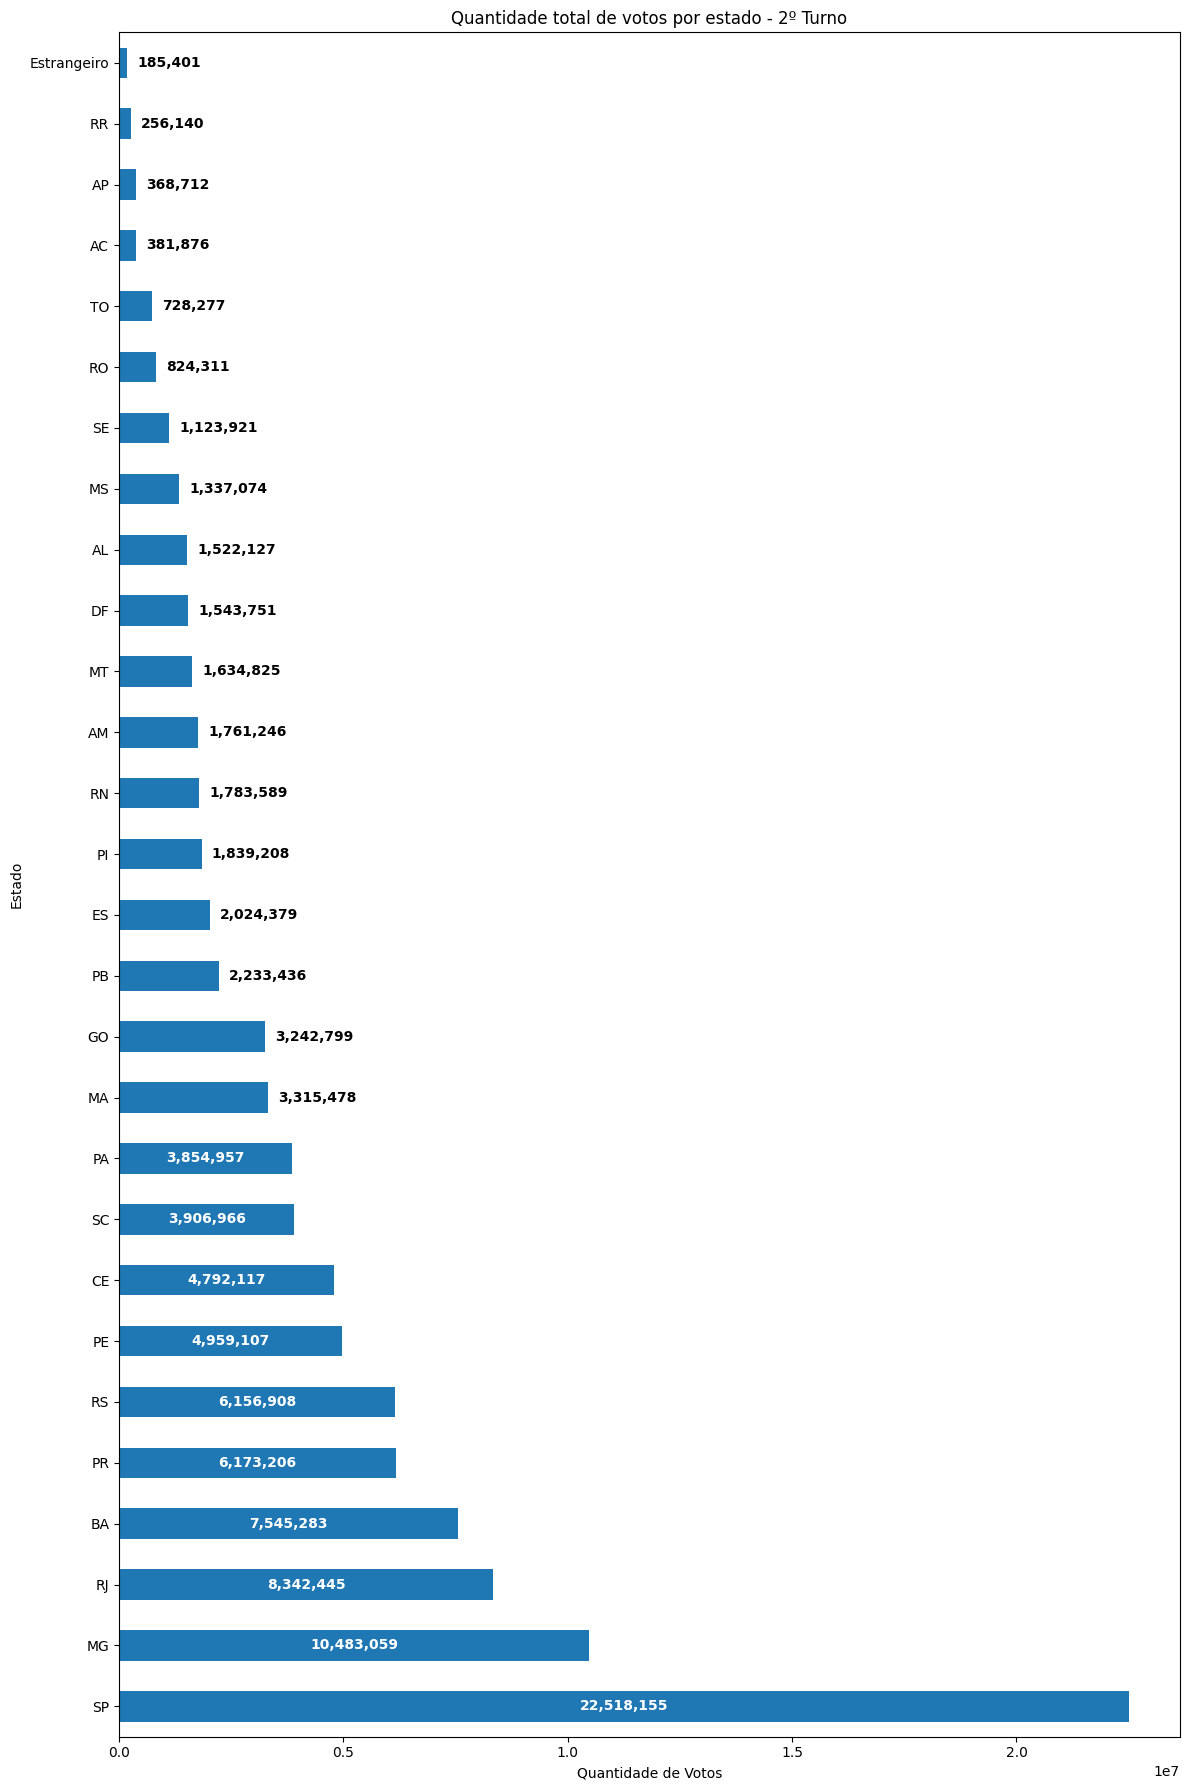

In [52]:
plt.figure(figsize=(12, 18))
ax = dt_votos_por_estado_2.plot(kind='barh', color='tab:blue')
plt.title('Quantidade total de votos por estado - 2º Turno')
plt.xlabel('Quantidade de Votos')
plt.ylabel('Estado')
plt.tight_layout()

for i, v in enumerate(dt_votos_por_estado_2):
    largura_barra = ax.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(dt_votos_por_estado_2) * 0.15:
        ax.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax.text(largura_barra + max(dt_votos_por_estado_2)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()

#### Filtros: Nenhum

In [53]:
dt_votos_nominais = dt_votos_filtrados[
    (dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal')
]

dt_votos_filtrados_estado_total = dt_votos_nominais.copy()
dt_votos_filtrados_estado_total['Sigla_UF'] = dt_votos_filtrados_estado_total['Sigla_UF'].apply(
    lambda uf: uf if uf in estados_br else 'Estrangeiro'
)

In [54]:
dt_votos_por_estado_total = dt_votos_filtrados_estado_total.groupby('Sigla_UF')['Quantidade_Votos'].sum().sort_values(ascending=False)

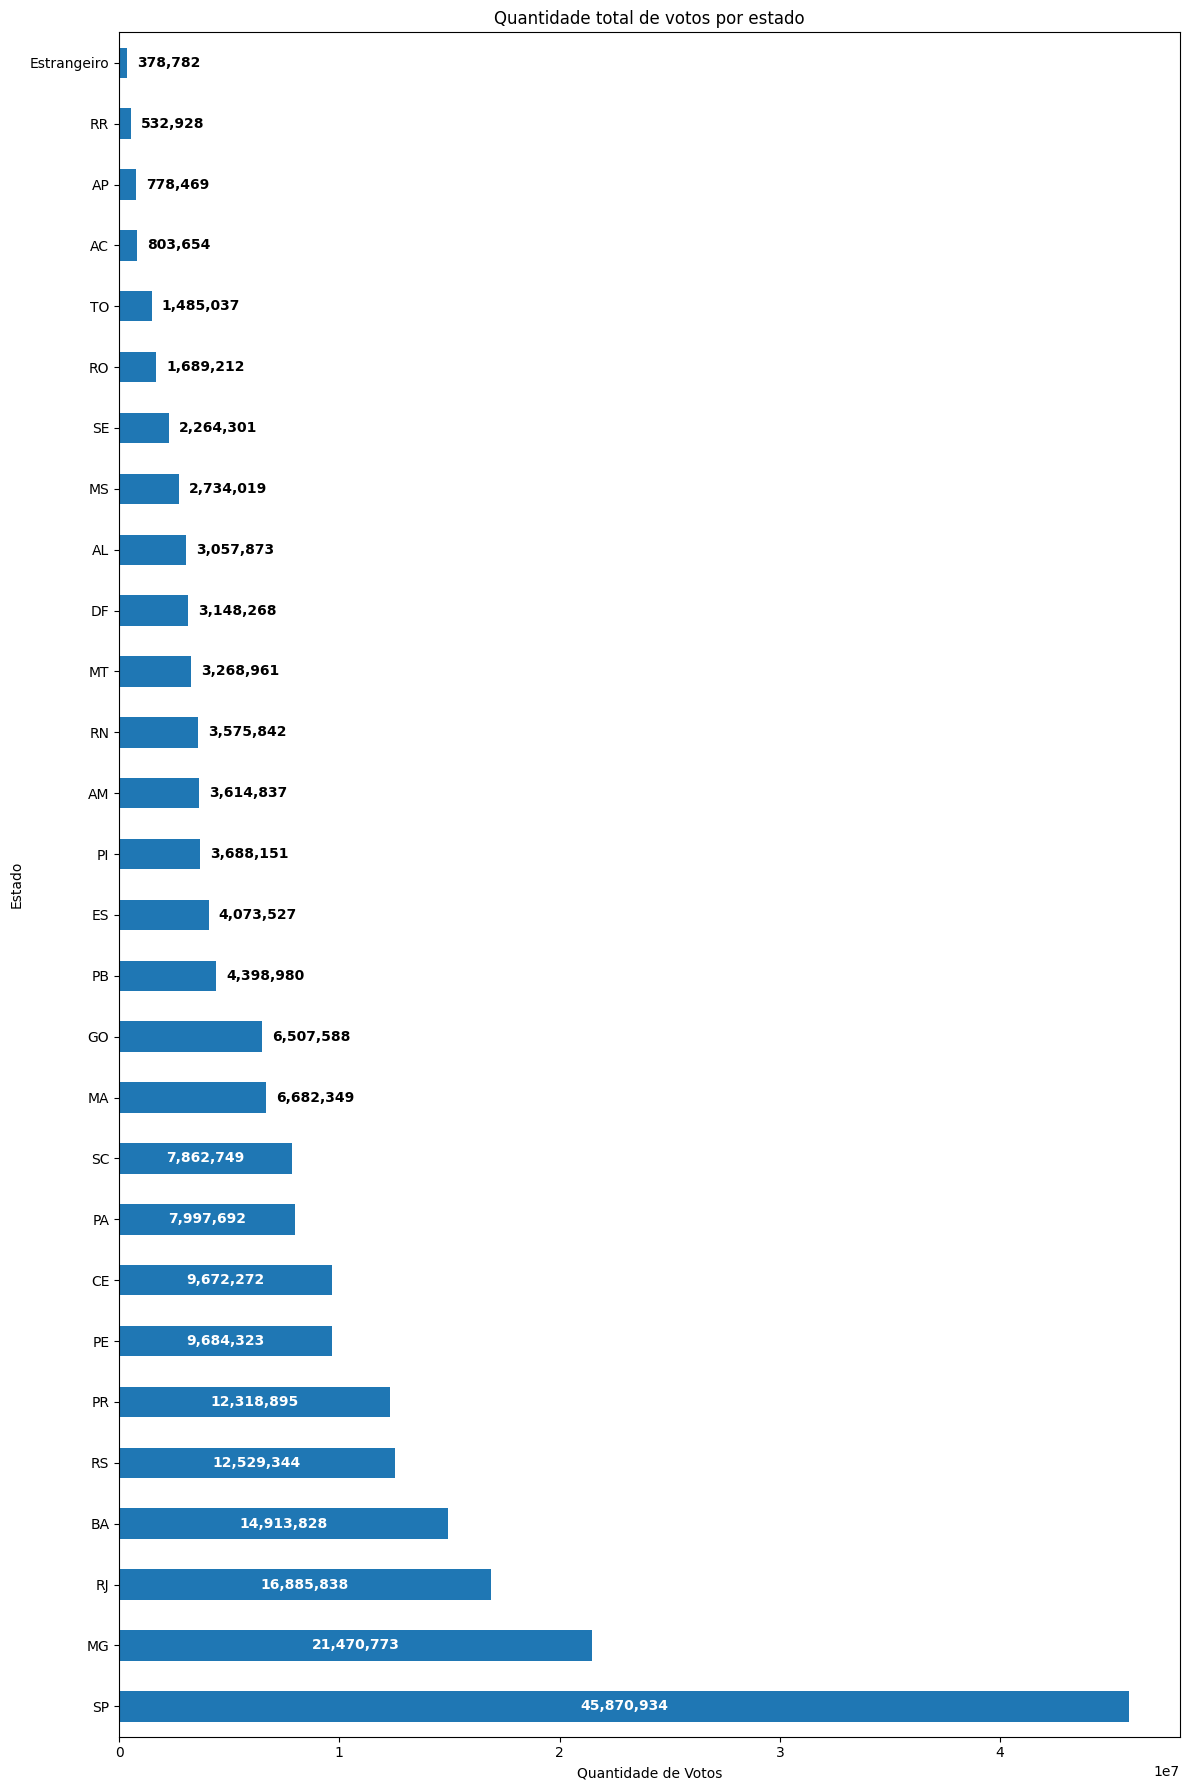

In [55]:
plt.figure(figsize=(12, 18))
ax = dt_votos_por_estado_total.plot(kind='barh', color='tab:blue')
plt.title('Quantidade total de votos por estado')
plt.xlabel('Quantidade de Votos')
plt.ylabel('Estado')
plt.tight_layout()

for i, v in enumerate(dt_votos_por_estado_total):
    largura_barra = ax.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(dt_votos_por_estado_total) * 0.15:
        ax.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax.text(largura_barra + max(dt_votos_por_estado_total)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()

### Quantidade de votos por partido

#### Filtro: 1º Turno

In [56]:
dt_votos_nominais_1 = dt_votos_filtrados[
    (dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal') &
    (dt_votos_filtrados['Numero_Turno'] == 1)
]
dt_votos_por_partido_1 = dt_votos_nominais_1.groupby('Sigla_Partido')['Quantidade_Votos'].sum().sort_values(ascending=False)


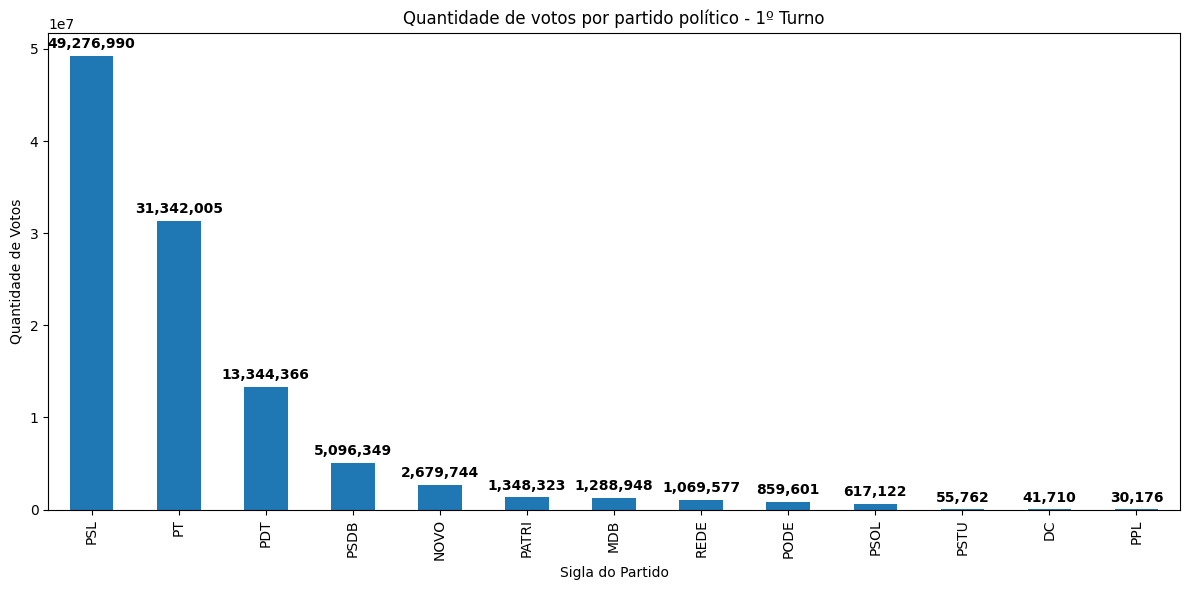

In [57]:
plt.figure(figsize=(12,6))
ax1 = dt_votos_por_partido_1.plot(kind='bar', color='tab:blue')
plt.title('Quantidade de votos por partido político - 1º Turno')
plt.xlabel('Sigla do Partido')
plt.ylabel('Quantidade de Votos')
plt.tight_layout()

for i, v in enumerate(dt_votos_por_partido_1):
    altura_barra = ax1.patches[i].get_height()
    texto = f'{v:,}'
    ax1.text(i, altura_barra + max(dt_votos_por_partido_1)*0.01, texto, ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

#### Filtro: 1º Turno e Região

In [58]:
dt_votos_partido_regiao_1 = dt_votos_nominais_1.groupby(['Regiao', 'Sigla_Partido'])['Quantidade_Votos'].sum().reset_index()

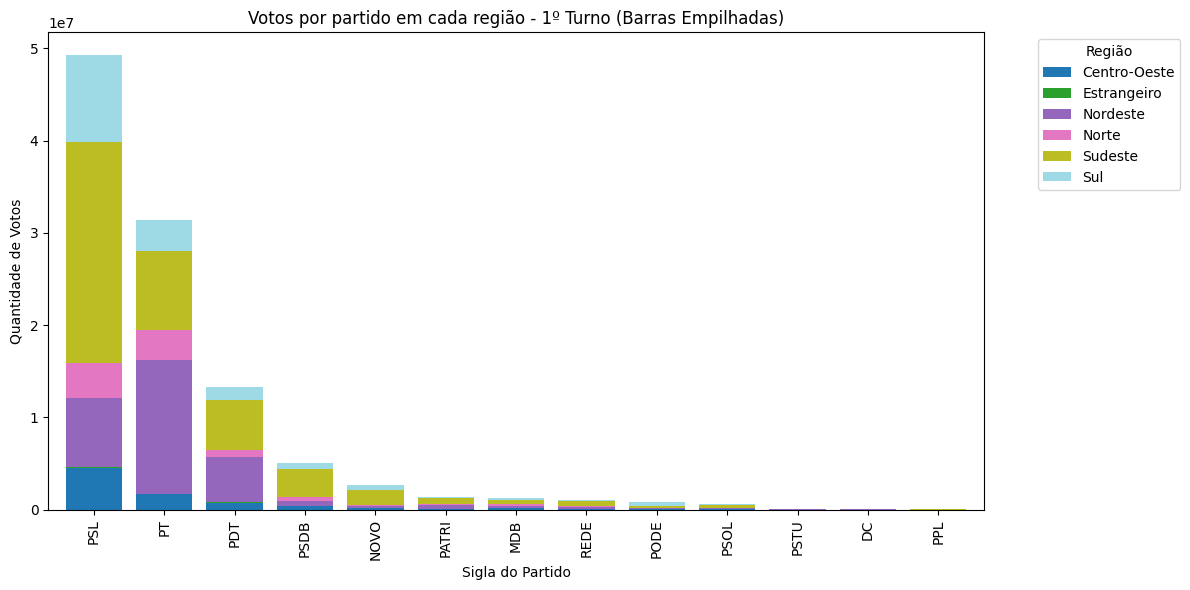

In [59]:
pivot_empilhado = dt_votos_partido_regiao_1.pivot(index='Sigla_Partido', columns='Regiao', values='Quantidade_Votos').fillna(0)
pivot_empilhado = pivot_empilhado.loc[pivot_empilhado.sum(axis=1).sort_values(ascending=False).index]  # Ordena partidos pelo total

fig, ax = plt.subplots(figsize=(12, 6))
pivot_empilhado.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=ax)
ax.set_title('Votos por partido em cada região - 1º Turno (Barras Empilhadas)')
ax.set_xlabel('Sigla do Partido')
ax.set_ylabel('Quantidade de Votos')
ax.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [60]:
tabela_votos_partido_regiao_1 = dt_votos_partido_regiao_1.pivot(
    index='Sigla_Partido',
    columns='Regiao',
    values='Quantidade_Votos'
).fillna(0).astype(int)

tabela_votos_partido_regiao_1['Total'] = tabela_votos_partido_regiao_1.sum(axis=1)
tabela_votos_partido_regiao_1 = tabela_votos_partido_regiao_1.sort_values('Total', ascending=False)

In [61]:
tabela_votos_partido_regiao_1

Regiao,Centro-Oeste,Estrangeiro,Nordeste,Norte,Sudeste,Sul,Total
Sigla_Partido,,,,,,,
PSL,4555415,113690,7453186,3785038,23915925,9453736,49276990
PT,1642054,19540,14583334,3211002,8623232,3262843,31342005
PDT,750776,28073,4892961,748170,5425104,1499282,13344366
PSDB,358475,6668,598968,388613,3018013,725612,5096349
NOVO,167364,13637,199009,92433,1671966,535335,2679744
PATRI,87518,1172,409796,114128,637904,97805,1348323
MDB,152606,952,248131,157792,479289,250178,1288948
REDE,85664,4961,217893,121121,516783,123155,1069577
PODE,52379,2733,71208,36643,277561,419077,859601


#### Filtro: 1º Turno e Estado

In [62]:
dt_votos_partido_estado_1 = dt_votos_nominais_1.groupby(['Sigla_UF', 'Sigla_Partido'])['Quantidade_Votos'].sum().reset_index()

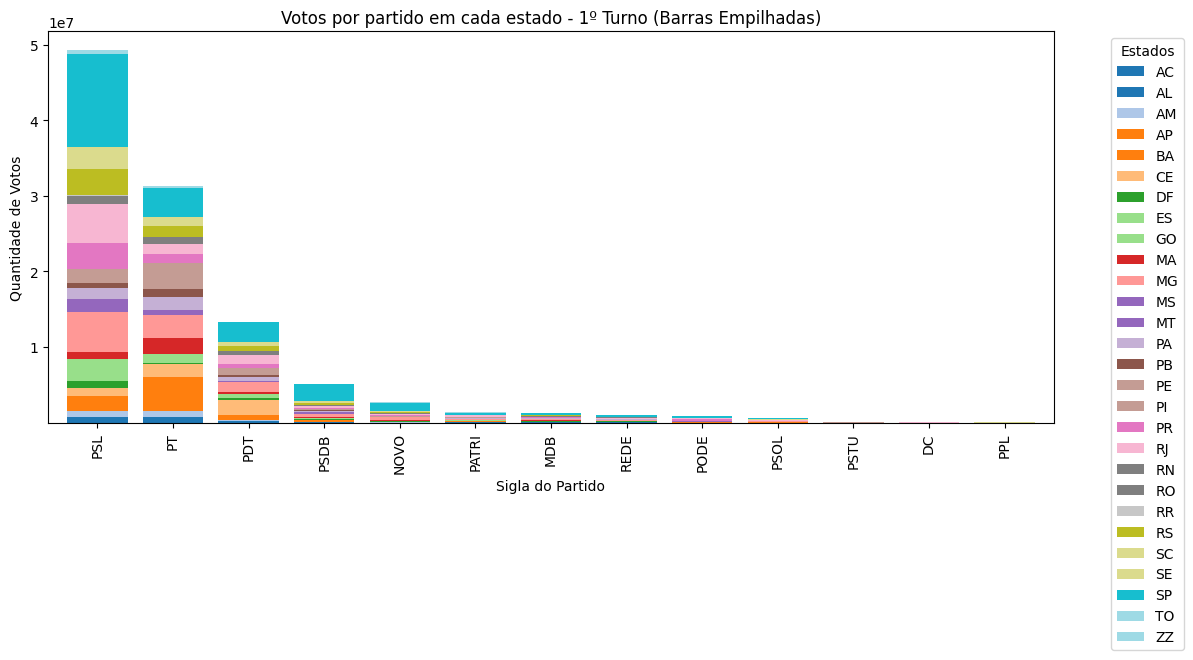

In [63]:
pivot_empilhado = dt_votos_partido_estado_1.pivot(index='Sigla_Partido', columns='Sigla_UF', values='Quantidade_Votos').fillna(0)
pivot_empilhado = pivot_empilhado.loc[pivot_empilhado.sum(axis=1).sort_values(ascending=False).index]  # Ordena partidos pelo total

fig, ax = plt.subplots(figsize=(12, 6))
pivot_empilhado.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=ax)
ax.set_title('Votos por partido em cada estado - 1º Turno (Barras Empilhadas)')
ax.set_xlabel('Sigla do Partido')
ax.set_ylabel('Quantidade de Votos')
ax.legend(title='Estados', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [64]:
tabela_votos_partido_estado_1 = dt_votos_partido_estado_1.pivot(
    index='Sigla_Partido',
    columns='Sigla_UF',
    values='Quantidade_Votos'
).fillna(0).astype(int)

tabela_votos_partido_estado_1['Total'] = tabela_votos_partido_estado_1.sum(axis=1)
tabela_votos_partido_estado_1 = tabela_votos_partido_estado_1.sort_values('Total', ascending=False)

In [65]:
tabela_votos_partido_estado_1

Sigla_UF,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,RN,RO,RR,RS,SC,SE,SP,TO,ZZ,Total
Sigla_Partido,,,,,,,,,,,,,,,,,,,,,
PSL,262508,528355,805902,166935,1725140,1061075,936494,1122131,1868686,817511,...,541448,538311,174306,3353623,2603665,310310,12378012,337782,113690,49276990
PT,78170,687247,746998,134287,4441955,1616492,190508,495868,713535,2062592,...,738165,176107,49406,1453291,598578,571234,3833982,311212,19540,31342005
PDT,21809,155457,138997,50553,693273,1998597,266272,195553,280864,282467,...,399766,52118,14838,724429,264312,148526,2650440,54262,28073,13344366
PSDB,33115,58580,29190,19241,172900,53157,53640,79049,146440,50653,...,40405,37048,19231,350800,154068,45978,2224049,21666,6668,5096349
NOVO,1990,11697,26888,7490,43800,23198,44879,44306,70023,17232,...,15570,16329,4309,186087,158562,9192,1062118,7113,13637,2679744
PATRI,3564,19106,31107,8882,138234,54786,26925,41734,33349,34204,...,20575,9816,2928,35458,22392,14069,274672,6284,1172,1348323
MDB,6458,43895,23420,5611,33109,27902,26939,22232,90778,52212,...,11480,12829,3426,124713,51670,8784,267725,5324,952,1288948
REDE,10557,15843,29196,9008,61481,18071,32115,26529,28783,23634,...,10690,7351,4098,50007,25813,15829,262050,7229,4961,1069577
PODE,1531,5128,8589,1435,20838,8142,11138,11352,15628,6320,...,5148,8738,1472,44890,51771,4483,177949,2471,2733,859601


#### Filtro: 2º Turno

In [66]:
dt_votos_nominais_2 = dt_votos_filtrados[
    (dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal') &
    (dt_votos_filtrados['Numero_Turno'] == 2)
]
dt_votos_por_partido_2 = dt_votos_nominais_2.groupby('Sigla_Partido')['Quantidade_Votos'].sum().sort_values(ascending=False)


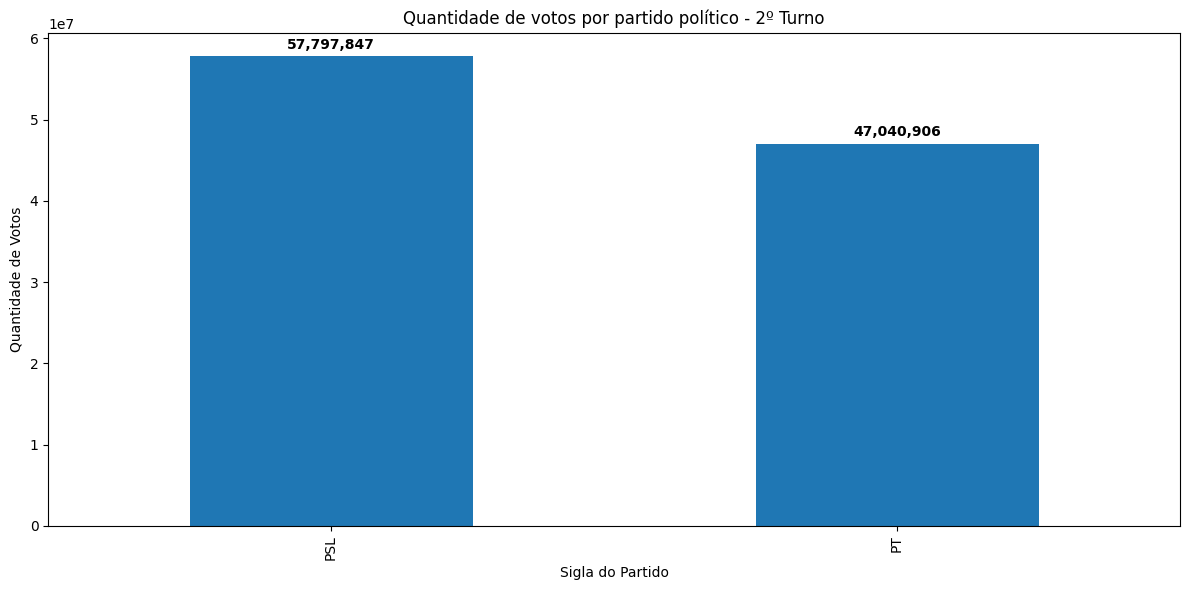

In [67]:
plt.figure(figsize=(12,6))
ax1 = dt_votos_por_partido_2.plot(kind='bar', color='tab:blue')
plt.title('Quantidade de votos por partido político - 2º Turno')
plt.xlabel('Sigla do Partido')
plt.ylabel('Quantidade de Votos')
plt.tight_layout()

for i, v in enumerate(dt_votos_por_partido_2):
    altura_barra = ax1.patches[i].get_height()
    texto = f'{v:,}'
    ax1.text(i, altura_barra + max(dt_votos_por_partido_2)*0.01, texto, ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

#### Filtro: 2º Turno, Região

In [68]:
dt_votos_partido_regiao_2 = dt_votos_nominais_2.groupby(['Regiao', 'Sigla_Partido'])['Quantidade_Votos'].sum().reset_index()

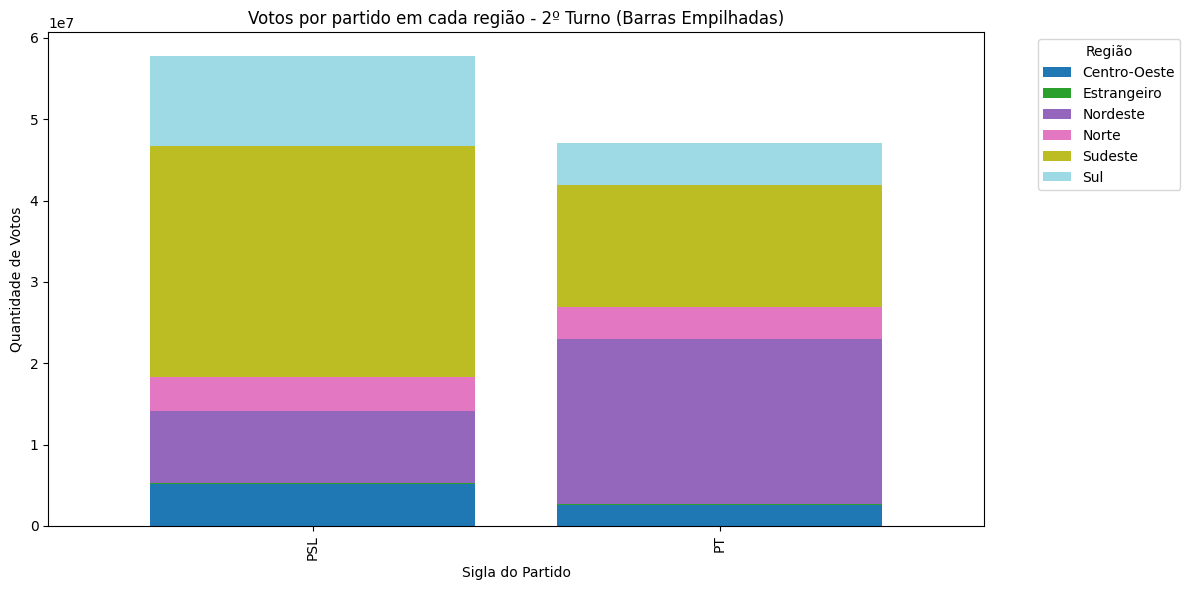

In [69]:
pivot_empilhado = dt_votos_partido_regiao_2.pivot(index='Sigla_Partido', columns='Regiao', values='Quantidade_Votos').fillna(0)
pivot_empilhado = pivot_empilhado.loc[pivot_empilhado.sum(axis=1).sort_values(ascending=False).index]  # Ordena partidos pelo total

fig, ax = plt.subplots(figsize=(12, 6))
pivot_empilhado.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=ax)
ax.set_title('Votos por partido em cada região - 2º Turno (Barras Empilhadas)')
ax.set_xlabel('Sigla do Partido')
ax.set_ylabel('Quantidade de Votos')
ax.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [70]:
tabela_votos_partido_regiao_2 = dt_votos_partido_regiao_2.pivot(
    index='Sigla_Partido',
    columns='Regiao',
    values='Quantidade_Votos'
).fillna(0).astype(int)

tabela_votos_partido_regiao_2['Total'] = tabela_votos_partido_regiao_2.sum(axis=1)
tabela_votos_partido_regiao_2 = tabela_votos_partido_regiao_2.sort_values('Total', ascending=False)

In [71]:
tabela_votos_partido_regiao_2

Regiao,Centro-Oeste,Estrangeiro,Nordeste,Norte,Sudeste,Sul,Total
Sigla_Partido,,,,,,,
PSL,5163023,131671,8824454,4242504,28351800,11084395,57797847
PT,2595426,53730,20289812,3933015,15016238,5152685,47040906


#### Filtro: 1º Turno e Estado

In [72]:
dt_votos_partido_estado_2 = dt_votos_nominais_2.groupby(['Sigla_UF', 'Sigla_Partido'])['Quantidade_Votos'].sum().reset_index()

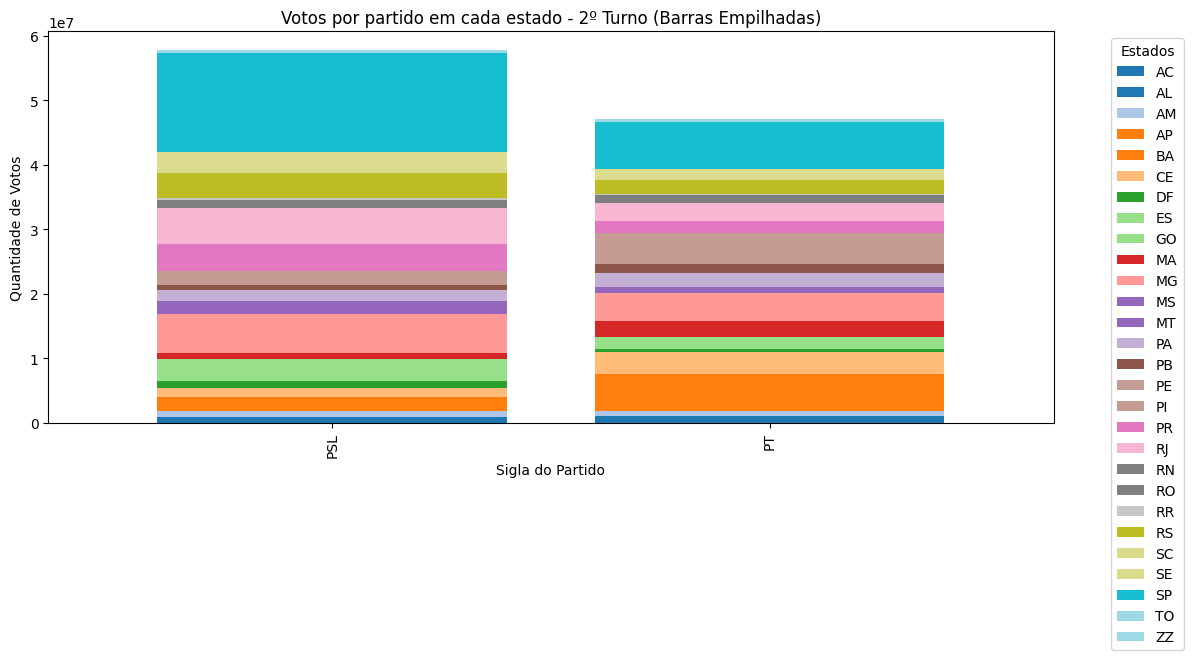

In [73]:
pivot_empilhado = dt_votos_partido_estado_2.pivot(index='Sigla_Partido', columns='Sigla_UF', values='Quantidade_Votos').fillna(0)
pivot_empilhado = pivot_empilhado.loc[pivot_empilhado.sum(axis=1).sort_values(ascending=False).index]

fig, ax = plt.subplots(figsize=(12, 6))
pivot_empilhado.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=ax)
ax.set_title('Votos por partido em cada estado - 2º Turno (Barras Empilhadas)')
ax.set_xlabel('Sigla do Partido')
ax.set_ylabel('Quantidade de Votos')
ax.legend(title='Estados', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [74]:
tabela_votos_partido_estado_2 = dt_votos_partido_estado_2.pivot(
    index='Sigla_Partido',
    columns='Sigla_UF',
    values='Quantidade_Votos'
).fillna(0).astype(int)

tabela_votos_partido_estado_2['Total'] = tabela_votos_partido_estado_2.sum(axis=1)
tabela_votos_partido_estado_2 = tabela_votos_partido_estado_2.sort_values('Total', ascending=False)

In [75]:
tabela_votos_partido_estado_2

Sigla_UF,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,RN,RO,RR,RS,SC,SE,SP,TO,ZZ,Total
Sigla_Partido,,,,,,,,,,,,,,,,,,,,,
PSL,294899,610093,885401,185096,2060382,1384591,1080411,1276611,2124739,886565,...,652562,594968,183268,3893737,2966242,364860,15306023,356684,131671,57797847
PT,86977,912034,875845,183616,5484901,3407526,463340,747768,1118060,2428913,...,1131027,229343,72872,2263171,940724,759061,7212132,371593,53730,47040906


#### Filtro: Nenhum

In [76]:
dt_votos_nominais_total = dt_votos_filtrados[dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal']
dt_votos_por_partido_total = dt_votos_nominais_total.groupby('Sigla_Partido')['Quantidade_Votos'].sum().sort_values(ascending=False)

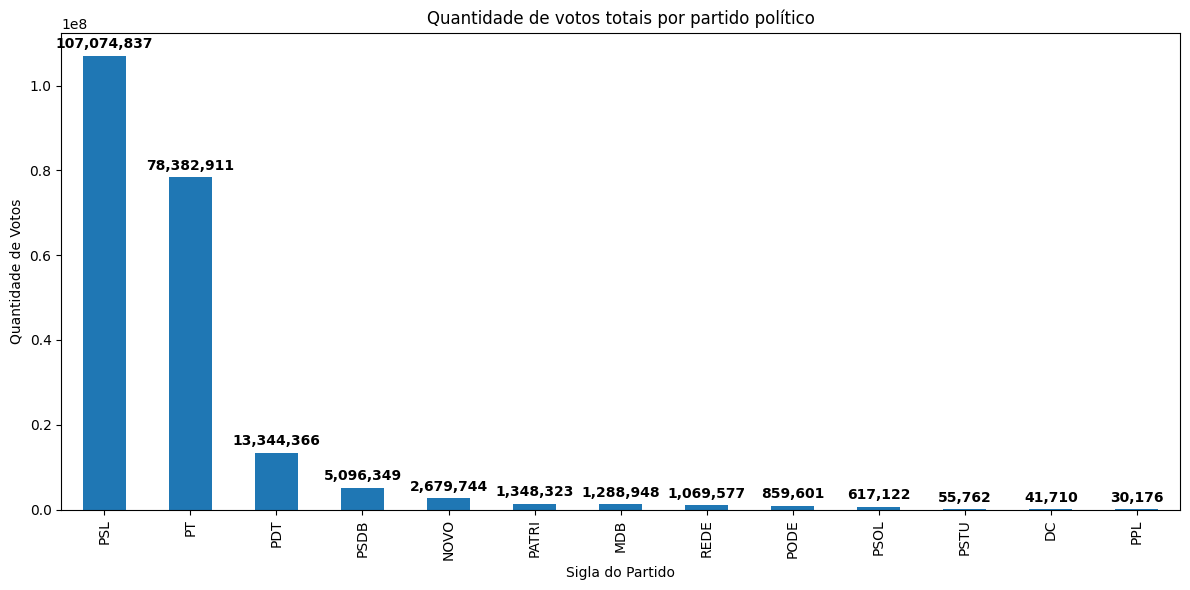

In [77]:
plt.figure(figsize=(12,6))
ax1 = dt_votos_por_partido_total.plot(kind='bar', color='tab:blue')
plt.title('Quantidade de votos totais por partido político')
plt.xlabel('Sigla do Partido')
plt.ylabel('Quantidade de Votos')
plt.tight_layout()

for i, v in enumerate(dt_votos_por_partido_total):
    altura_barra = ax1.patches[i].get_height()
    texto = f'{v:,}'
    ax1.text(i, altura_barra + max(dt_votos_por_partido_total)*0.01, texto, ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

### Quantidade de votos por candidato

#### Filtro: 1º Turno

In [78]:
votos_candidato_turno_1 = dt_votos_filtrados[
    (dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal') &
    (dt_votos_filtrados['Numero_Turno'] == 1)
]
votos_candidato_sum_1 = votos_candidato_turno_1.groupby('Nome_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)

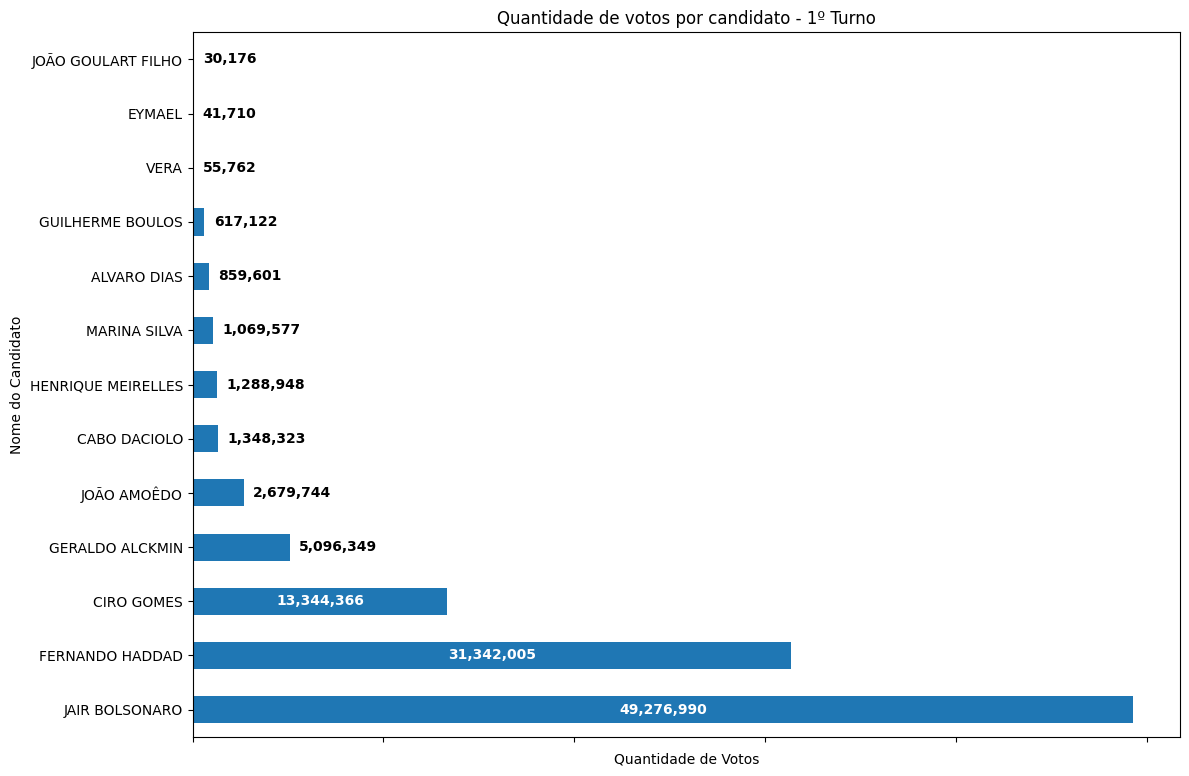

In [79]:
plt.figure(figsize=(12,8))
ax1 = votos_candidato_sum_1.plot(kind='barh', color='tab:blue')
plt.title('Quantidade de votos por candidato - 1º Turno')
plt.xlabel('Quantidade de Votos')
plt.ylabel('Nome do Candidato')
plt.tight_layout()
ax1.set_xticklabels([])

for i, v in enumerate(votos_candidato_sum_1):
    largura_barra = ax1.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(votos_candidato_sum_1) * 0.15:
        ax1.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax1.text(largura_barra + max(votos_candidato_sum_1)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()

#### Filtro: 1º Turno e Região

In [80]:
dt_votos_candidato_regiao_1 = dt_votos_nominais_1.groupby(['Regiao', 'Nome_Votavel'])['Quantidade_Votos'].sum().reset_index()

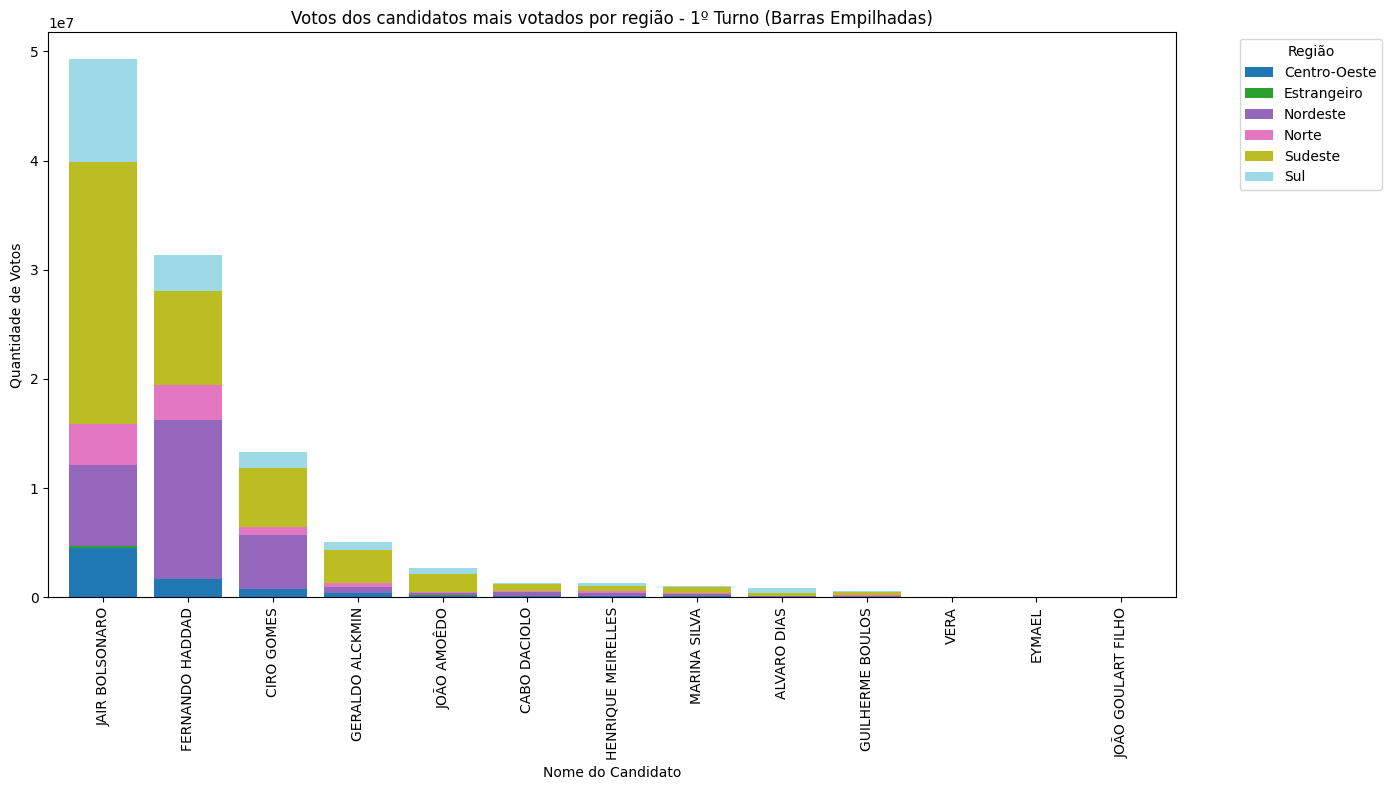

In [81]:
pivot = dt_votos_candidato_regiao_1.groupby('Nome_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)
nomes = pivot.index.tolist()

pivot_empilhado = dt_votos_candidato_regiao_1[dt_votos_candidato_regiao_1['Nome_Votavel'].isin(nomes)]
pivot_empilhado = pivot_empilhado.pivot(
    index='Nome_Votavel',
    columns='Regiao',
    values='Quantidade_Votos'
).fillna(0)
pivot_empilhado = pivot_empilhado.loc[pivot.index]  # Mantém ordem dos mais votados

fig, ax = plt.subplots(figsize=(14, 8))
pivot_empilhado.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=ax)
ax.set_title('Votos dos candidatos mais votados por região - 1º Turno (Barras Empilhadas)')
ax.set_xlabel('Nome do Candidato')
ax.set_ylabel('Quantidade de Votos')
ax.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [82]:
tabela_votos_candidato_regiao_1 = dt_votos_candidato_regiao_1.pivot(
    index='Nome_Votavel',
    columns='Regiao',
    values='Quantidade_Votos'
).fillna(0).astype(int)

tabela_votos_candidato_regiao_1['Total'] = tabela_votos_candidato_regiao_1.sum(axis=1)
tabela_votos_candidato_regiao_1 = tabela_votos_candidato_regiao_1.sort_values('Total', ascending=False)

In [83]:
tabela_votos_candidato_regiao_1

Regiao,Centro-Oeste,Estrangeiro,Nordeste,Norte,Sudeste,Sul,Total
Nome_Votavel,,,,,,,
JAIR BOLSONARO,4555415,113690,7453186,3785038,23915925,9453736,49276990
FERNANDO HADDAD,1642054,19540,14583334,3211002,8623232,3262843,31342005
CIRO GOMES,750776,28073,4892961,748170,5425104,1499282,13344366
GERALDO ALCKMIN,358475,6668,598968,388613,3018013,725612,5096349
JOÃO AMOÊDO,167364,13637,199009,92433,1671966,535335,2679744
CABO DACIOLO,87518,1172,409796,114128,637904,97805,1348323
HENRIQUE MEIRELLES,152606,952,248131,157792,479289,250178,1288948
MARINA SILVA,85664,4961,217893,121121,516783,123155,1069577
ALVARO DIAS,52379,2733,71208,36643,277561,419077,859601


#### Filtro: 1º Turno e Estado

In [84]:
dt_votos_candidato_estado_1 = dt_votos_nominais_1.groupby(['Sigla_UF', 'Nome_Votavel'])['Quantidade_Votos'].sum().reset_index()

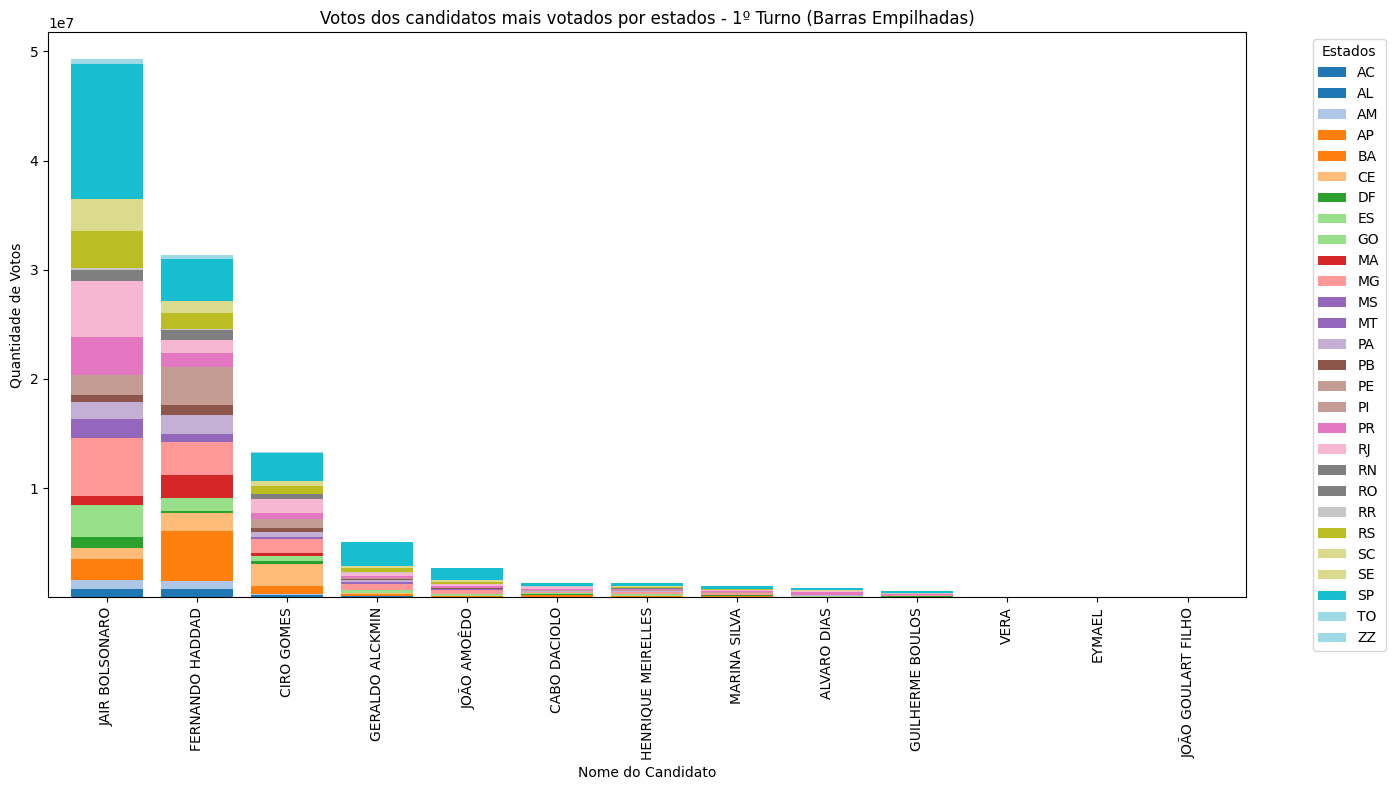

In [85]:
pivot = dt_votos_candidato_estado_1.groupby('Nome_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)
nomes = pivot.index.tolist()

pivot_empilhado = dt_votos_candidato_estado_1[dt_votos_candidato_estado_1['Nome_Votavel'].isin(nomes)]
pivot_empilhado = pivot_empilhado.pivot(
    index='Nome_Votavel',
    columns='Sigla_UF',
    values='Quantidade_Votos'
).fillna(0)
pivot_empilhado = pivot_empilhado.loc[pivot.index]

fig, ax = plt.subplots(figsize=(14, 8))
pivot_empilhado.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=ax)
ax.set_title('Votos dos candidatos mais votados por estados - 1º Turno (Barras Empilhadas)')
ax.set_xlabel('Nome do Candidato')
ax.set_ylabel('Quantidade de Votos')
ax.legend(title='Estados', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [86]:
tabela_votos_candidato_estado_1 = dt_votos_candidato_estado_1.pivot(
    index='Nome_Votavel',
    columns='Sigla_UF',
    values='Quantidade_Votos'
).fillna(0).astype(int)

tabela_votos_candidato_estado_1['Total'] = tabela_votos_candidato_estado_1.sum(axis=1)
tabela_votos_candidato_estado_1 = tabela_votos_candidato_estado_1.sort_values('Total', ascending=False)

In [87]:
tabela_votos_candidato_estado_1

Sigla_UF,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,RN,RO,RR,RS,SC,SE,SP,TO,ZZ,Total
Nome_Votavel,,,,,,,,,,,,,,,,,,,,,
JAIR BOLSONARO,262508,528355,805902,166935,1725140,1061075,936494,1122131,1868686,817511,...,541448,538311,174306,3353623,2603665,310310,12378012,337782,113690,49276990
FERNANDO HADDAD,78170,687247,746998,134287,4441955,1616492,190508,495868,713535,2062592,...,738165,176107,49406,1453291,598578,571234,3833982,311212,19540,31342005
CIRO GOMES,21809,155457,138997,50553,693273,1998597,266272,195553,280864,282467,...,399766,52118,14838,724429,264312,148526,2650440,54262,28073,13344366
GERALDO ALCKMIN,33115,58580,29190,19241,172900,53157,53640,79049,146440,50653,...,40405,37048,19231,350800,154068,45978,2224049,21666,6668,5096349
JOÃO AMOÊDO,1990,11697,26888,7490,43800,23198,44879,44306,70023,17232,...,15570,16329,4309,186087,158562,9192,1062118,7113,13637,2679744
CABO DACIOLO,3564,19106,31107,8882,138234,54786,26925,41734,33349,34204,...,20575,9816,2928,35458,22392,14069,274672,6284,1172,1348323
HENRIQUE MEIRELLES,6458,43895,23420,5611,33109,27902,26939,22232,90778,52212,...,11480,12829,3426,124713,51670,8784,267725,5324,952,1288948
MARINA SILVA,10557,15843,29196,9008,61481,18071,32115,26529,28783,23634,...,10690,7351,4098,50007,25813,15829,262050,7229,4961,1069577
ALVARO DIAS,1531,5128,8589,1435,20838,8142,11138,11352,15628,6320,...,5148,8738,1472,44890,51771,4483,177949,2471,2733,859601


#### Filtro: 2º Turno

In [88]:
votos_candidato_turno_2 = dt_votos_filtrados[
    (dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal') &
    (dt_votos_filtrados['Numero_Turno'] == 2)
]
votos_candidato_sum_2 = votos_candidato_turno_2.groupby('Nome_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)

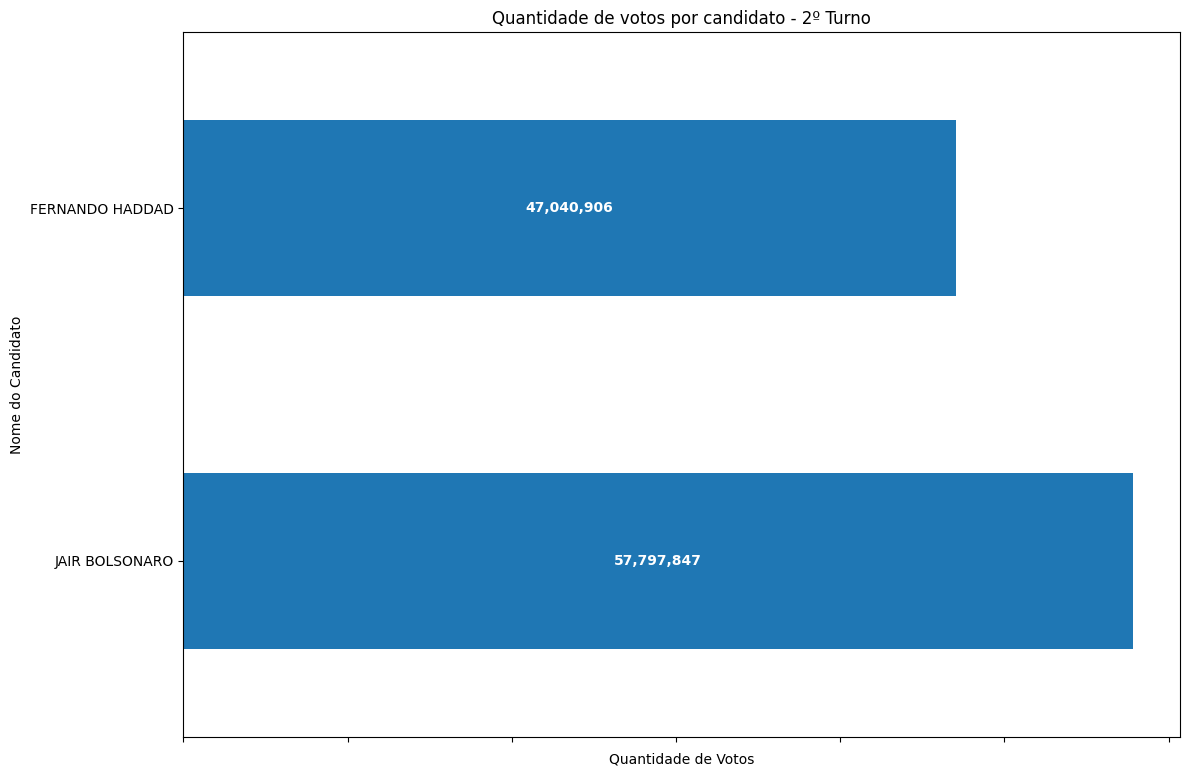

In [89]:
plt.figure(figsize=(12,8))
ax1 = votos_candidato_sum_2.plot(kind='barh', color='tab:blue')
plt.title('Quantidade de votos por candidato - 2º Turno')
plt.xlabel('Quantidade de Votos')
plt.ylabel('Nome do Candidato')
plt.tight_layout()
ax1.set_xticklabels([])

for i, v in enumerate(votos_candidato_sum_2):
    largura_barra = ax1.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(votos_candidato_sum_2) * 0.15:
        ax1.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax1.text(largura_barra + max(votos_candidato_sum_2)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()

#### Filtro: 2º Turno e Região

In [90]:
dt_votos_candidato_regiao_2 = dt_votos_nominais_2.groupby(['Regiao', 'Nome_Votavel'])['Quantidade_Votos'].sum().reset_index()

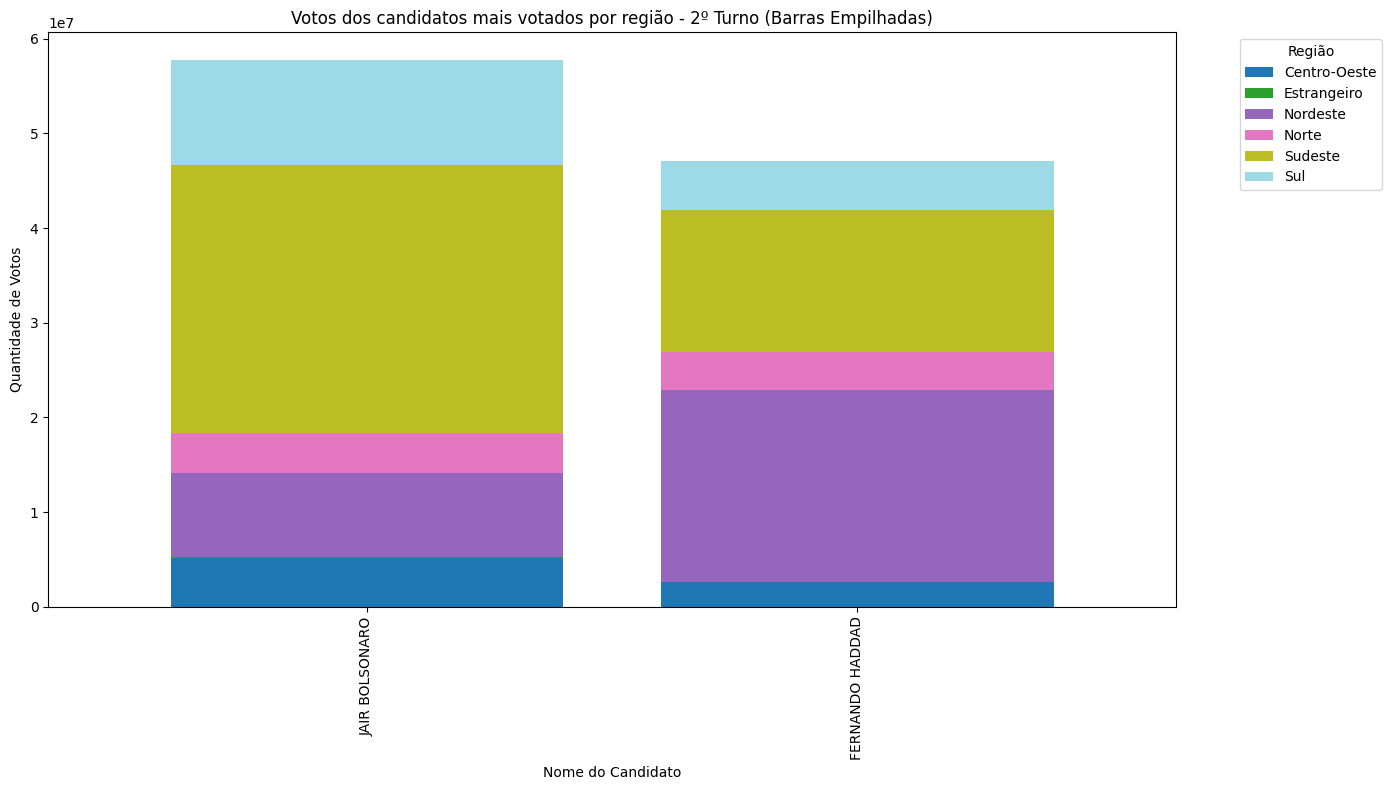

In [91]:
pivot = dt_votos_candidato_regiao_2.groupby('Nome_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)
nomes = pivot.index.tolist()

pivot_empilhado = dt_votos_candidato_regiao_2[dt_votos_candidato_regiao_2['Nome_Votavel'].isin(nomes)]
pivot_empilhado = pivot_empilhado.pivot(
    index='Nome_Votavel',
    columns='Regiao',
    values='Quantidade_Votos'
).fillna(0)
pivot_empilhado = pivot_empilhado.loc[pivot.index]  # Mantém ordem dos mais votados

fig, ax = plt.subplots(figsize=(14, 8))
pivot_empilhado.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=ax)
ax.set_title('Votos dos candidatos mais votados por região - 2º Turno (Barras Empilhadas)')
ax.set_xlabel('Nome do Candidato')
ax.set_ylabel('Quantidade de Votos')
ax.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [92]:
tabela_votos_candidato_regiao_2 = dt_votos_candidato_regiao_2.pivot(
    index='Nome_Votavel',
    columns='Regiao',
    values='Quantidade_Votos'
).fillna(0).astype(int)

tabela_votos_candidato_regiao_2['Total'] = tabela_votos_candidato_regiao_2.sum(axis=1)
tabela_votos_candidato_regiao_2 = tabela_votos_candidato_regiao_2.sort_values('Total', ascending=False)

In [93]:
tabela_votos_candidato_regiao_2

Regiao,Centro-Oeste,Estrangeiro,Nordeste,Norte,Sudeste,Sul,Total
Nome_Votavel,,,,,,,
JAIR BOLSONARO,5163023,131671,8824454,4242504,28351800,11084395,57797847
FERNANDO HADDAD,2595426,53730,20289812,3933015,15016238,5152685,47040906


#### Filtro: 2º Turno e Estado

In [94]:
dt_votos_candidato_estado_2 = dt_votos_nominais_2.groupby(['Sigla_UF', 'Nome_Votavel'])['Quantidade_Votos'].sum().reset_index()

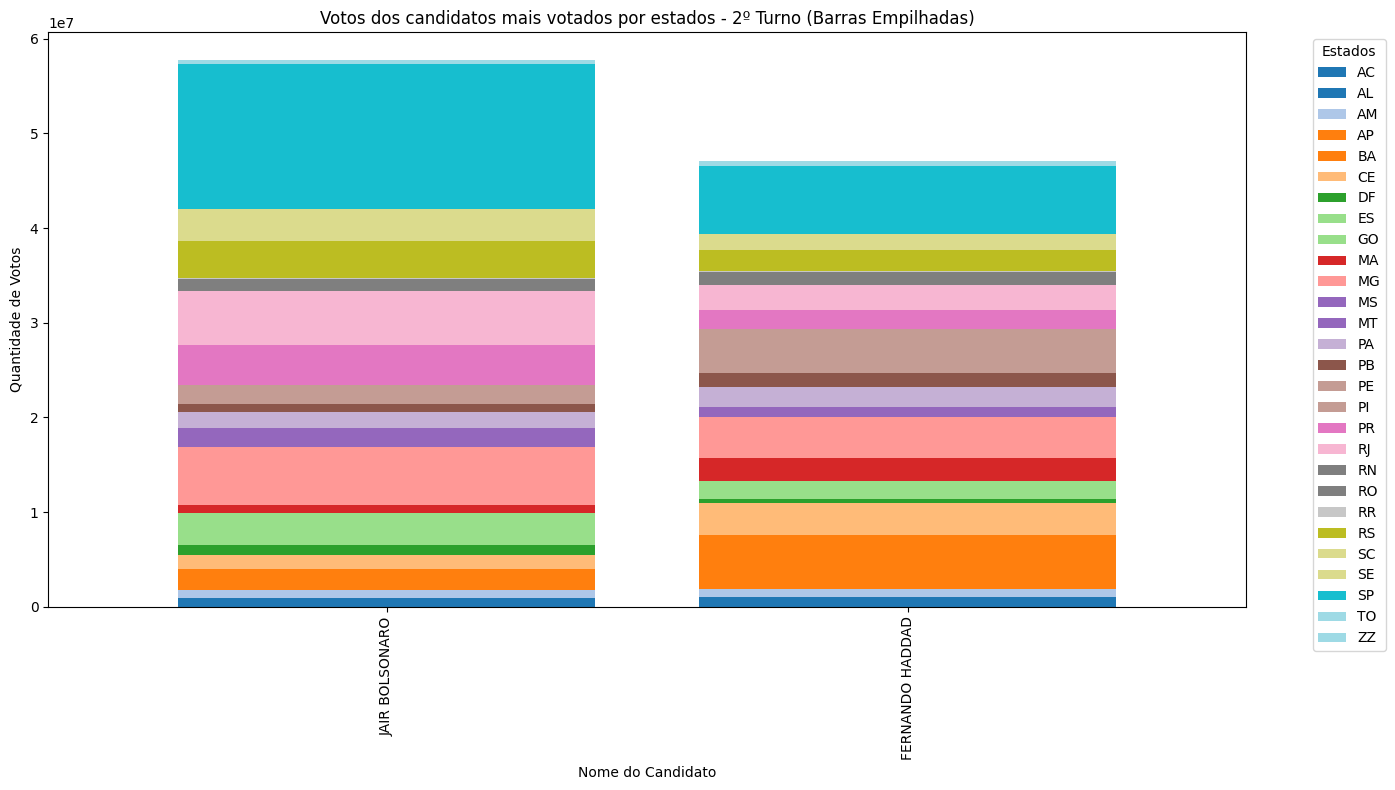

In [95]:
pivot = dt_votos_candidato_estado_2.groupby('Nome_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)
nomes = pivot.index.tolist()

pivot_empilhado = dt_votos_candidato_estado_2[dt_votos_candidato_estado_2['Nome_Votavel'].isin(nomes)]
pivot_empilhado = pivot_empilhado.pivot(
    index='Nome_Votavel',
    columns='Sigla_UF',
    values='Quantidade_Votos'
).fillna(0)
pivot_empilhado = pivot_empilhado.loc[pivot.index]

fig, ax = plt.subplots(figsize=(14, 8))
pivot_empilhado.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=ax)
ax.set_title('Votos dos candidatos mais votados por estados - 2º Turno (Barras Empilhadas)')
ax.set_xlabel('Nome do Candidato')
ax.set_ylabel('Quantidade de Votos')
ax.legend(title='Estados', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [96]:
tabela_votos_candidato_estado_2 = dt_votos_candidato_estado_2.pivot(
    index='Nome_Votavel',
    columns='Sigla_UF',
    values='Quantidade_Votos'
).fillna(0).astype(int)

tabela_votos_candidato_estado_2['Total'] = tabela_votos_candidato_estado_2.sum(axis=1)
tabela_votos_candidato_estado_2 = tabela_votos_candidato_estado_2.sort_values('Total', ascending=False)

In [97]:
tabela_votos_candidato_estado_2

Sigla_UF,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,RN,RO,RR,RS,SC,SE,SP,TO,ZZ,Total
Nome_Votavel,,,,,,,,,,,,,,,,,,,,,
JAIR BOLSONARO,294899,610093,885401,185096,2060382,1384591,1080411,1276611,2124739,886565,...,652562,594968,183268,3893737,2966242,364860,15306023,356684,131671,57797847
FERNANDO HADDAD,86977,912034,875845,183616,5484901,3407526,463340,747768,1118060,2428913,...,1131027,229343,72872,2263171,940724,759061,7212132,371593,53730,47040906


#### Filtros: Nenhum

In [98]:
votos_candidato_turno_total = dt_votos_filtrados[
    (dt_votos_filtrados['Descricao_Tipo_Votavel'] == 'Nominal')
]
votos_candidato_sum_total = votos_candidato_turno_total.groupby('Nome_Votavel')['Quantidade_Votos'].sum().sort_values(ascending=False)

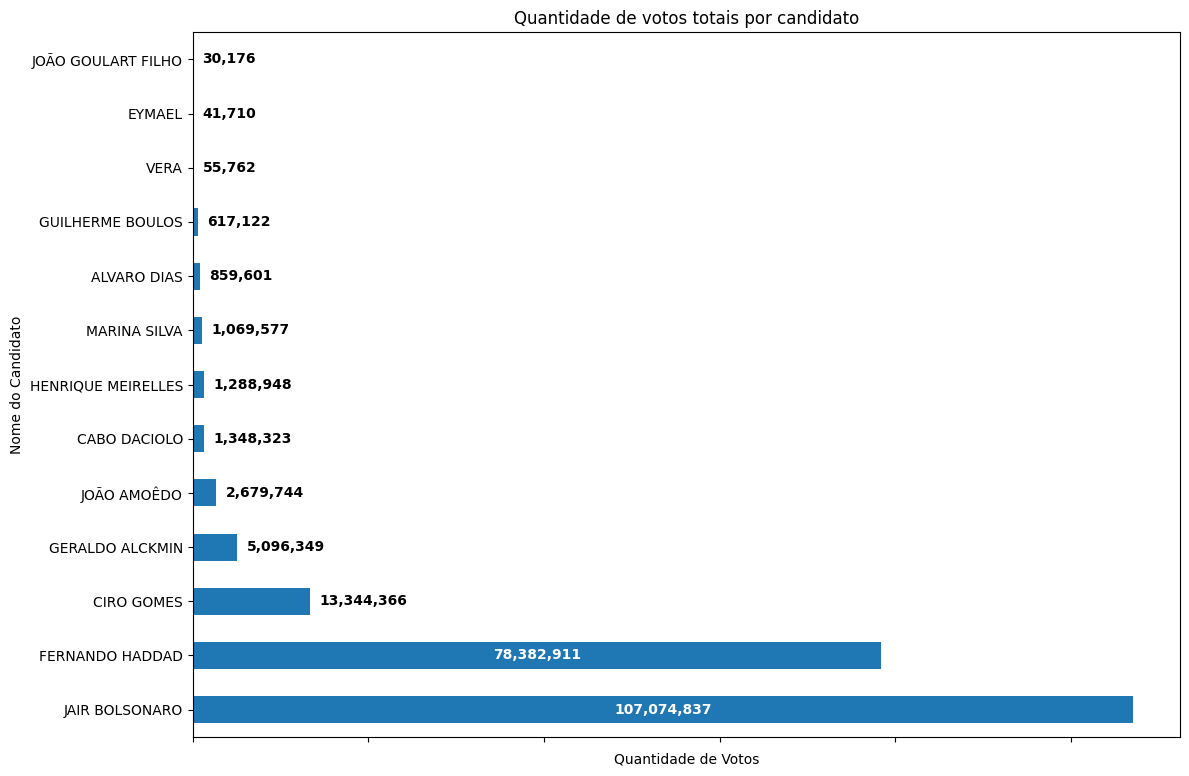

In [99]:
plt.figure(figsize=(12,8))
ax1 = votos_candidato_sum_total.plot(kind='barh', color='tab:blue')
plt.title('Quantidade de votos totais por candidato')
plt.xlabel('Quantidade de Votos')
plt.ylabel('Nome do Candidato')
plt.tight_layout()
ax1.set_xticklabels([])

for i, v in enumerate(votos_candidato_sum_total):
    largura_barra = ax1.patches[i].get_width()
    texto = f'{v:,}'
    if largura_barra > max(votos_candidato_sum_total) * 0.15:
        ax1.text(largura_barra / 2, i, texto, va='center', ha='center', color='white', fontweight='bold')
    else:
        ax1.text(largura_barra + max(votos_candidato_sum_total)*0.01, i, texto, va='center', ha='left', color='black', fontweight='bold')

plt.show()